# Predicting House Prices Using Machine Learning with Scikit-learn

## 📘 Introduction

This project focuses on predicting house sale prices using various machine learning models, with a special focus on the XGBoost algorithm.

The dataset originates from the classic Ames Housing dataset, which includes detailed information about residential homes in Ames, Iowa. The task is to build an accurate regression model that can predict housing prices based on structured features like size, quality, location, and condition.

In this notebook, we will:
- Perform data preprocessing and feature engineering
- Train and compare multiple regression models (Default Linear and ElasticNet CV, Decision Tree, Random Forest, XGBoost)
- Use hyperparameter tuning and early stopping for optimization
- Apply SHAP to explain model predictions both globally and locally

This combination of predictive performance and model interpretability makes this project highly relevant for real-world applications and job portfolios.



**Dataset Information**

Source: Kaggle Competition
House Prices: Advanced Regression Techniques

Train data: train.csv (includes SalePrice target)

Test data: test.csv (without target)

Features: Over 70 columns describing property characteristics (e.g., LotArea, GrLivArea, OverallQual, Neighborhood, etc.)



# Importing libraries and Read data files

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install -U xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 MB 4.2 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 2.1.4
    Uninstalling xgboost-2.1.4:
      Successfully uninstalled xgboost-2.1.4


In [2]:
import os

# List files in the current directory
print("Files in current directory:")
print(os.listdir('.'))

# If you think the file is in the /content directory, uncomment and run the following:
# print("\nFiles in /content directory:")
# print(os.listdir('/content'))

# If you mounted Google Drive and the file is there, uncomment and run the following:
# print("\nFiles in Google Drive (My Drive):")
# print(os.listdir('/content/drive/My Drive'))

Files in current directory:
['.config', 'sample_data']


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/house-prices-advanced-regression-techniques/train.csv')
# Show all columns
pd.set_option('display.max_columns', None)
df.head(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

### Understanding the Big Picture - *Nature of Data*

1. What is the business problem you're trying to solve using machine learning?

We aim to predict the *sale price of a property* (SalePrice) based on various features related to the property's characteristics, location, and condition.

2. Why are we interested in solving this problem? What impact will it have on the business?
Accurate house price prediction is crucial for:

*Real estate agencies: To set fair market prices.*

*Buyers/sellers: To make informed decisions.*

*Mortgage lenders: To assess lending risk.*

*Property investors: To forecast potential ROI.*

3. How much historical data do we have, and how was it collected?

We have 1,460 observations (in the basic version of the dataset) across more than 80 features, collected from actual house sales in Ames, Iowa over several years

4. What features does the historical data contain? Does it include the historical values for what we're trying to predict?
Yes, the data includes:

A target variable: *SalePrice*.

Features spanning structural (e.g., GrLivArea, GarageArea), location (Neighborhood), quality (OverallQual, ExterQual), and temporal (YearBuilt, YrSold) aspects.

It provides both input features and historical sale prices required for supervised learning.

5. Who will use the results of this model, and how does it fit into other business processes?
Potential users:

*Real estate professionals: Use the model to assist in property listings.*

*Home buyers/sellers: Use the tool for price validation.*

*Lenders: Use it for automated property appraisal before loans.*

In [5]:
df.shape

(1460, 81)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
df = df.drop(columns=['Id'])
df.describe().transpose()

count           mean           std      min        25%  \
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage    1201.0      70.049958     24.284752     21.0      59.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1452.0     103.685262    181.066207      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF       1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF       1460.0     346.992466    436.528436      0.0       0.00   
LowQualFinSF   1460.0       5.844521     48.623081      0.0       0.00   
GrLivArea      1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath   1460.0       0.425342      0.518911      0.0       0.00   
BsmtHalfBath   1460.0       0.057534      0.238753      0.0       0.00   
FullBath       1460.0       1.565068      0.550916      0.0       1.00   
HalfBath       1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr   1460.0       2.866438      0.815778      0.0       2.00   
KitchenAbvGr   1460.0       1.046575      0.220338      0.0       1.00   
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces     1460.0       0.613014      0.644666      0.0       0.00   
GarageYrBlt    1379.0    1978.506164     24.689725   1900.0    1961.00   
GarageCars     1460.0       1.767123      0.747315      0.0       1.00   
GarageArea     1460.0     472.980137    213.804841      0.0     334.50   
WoodDeckSF     1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF    1460.0      46.660274     66.256028      0.0       0.00   
EnclosedPorch  1460.0      21.954110     61.119149      0.0       0.00   
3SsnPorch      1460.0       3.409589     29.317331      0.0       0.00   
ScreenPorch    1460.0      15.060959     55.757415      0.0       0.00   
PoolArea       1460.0       2.758904     40.177307      0.0       0.00   
MiscVal        1460.0      43.489041    496.123024      0.0       0.00   
MoSold         1460.0       6.321918      2.703626      1.0       5.00   
YrSold         1460.0    2007.815753      1.328095   2006.0    2007.00   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  129975.00   

                    50%        75%       max  
MSSubClass         50.0      70.00     190.0  
LotFrontage        69.0      80.00     313.0  
LotArea          9478.5   11601.50  215245.0  
OverallQual         6.0       7.00      10.0  
OverallCond         5.0       6.00       9.0  
YearBuilt        1973.0    2000.00    2010.0  
YearRemodAdd     1994.0    2004.00    2010.0  
MasVnrArea          0.0     166.00    1600.0  
BsmtFinSF1        383.5     712.25    5644.0  
BsmtFinSF2          0.0       0.00    1474.0  
BsmtUnfSF         477.5     808.00    2336.0  
TotalBsmtSF       991.5    1298.25    6110.0  
1stFlrSF         1087.0    1391.25    4692.0  
2ndFlrSF            0.0     728.00    2065.0  
LowQualFinSF        0.0       0.00     572.0  
GrLivArea        1464.0    1776.75    5642.0  
BsmtFullBath        0.0       1.00       3.0  
BsmtHalfBath        0.0       0.00       2.0  
FullBath            2.0       2.00       3.0  
HalfBath            0.0       1.00       2.0  
BedroomAbvGr        3.0       3.00       8.0  
KitchenAbvGr        1.0       1.00       3.0  
TotRmsAbvGrd        6.0       7.00      14.0  
Fireplaces          1.0       1.00       3.0  
GarageYrBlt      1980.0    2

# Exploratory Data Analysis and Visualization

<Figure size 2500x1200 with 0 Axes>

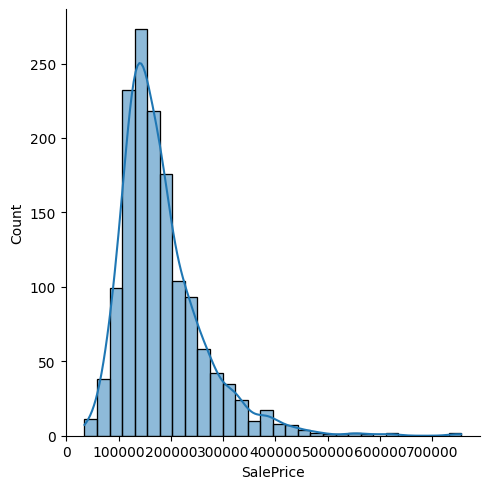

In [8]:
plt.figure(figsize=(25,12))
sns.displot(df['SalePrice'], kde=True, bins=30)

Plot shows us the distribution of sale price. The most common sale price varies between 120,000 and 160,000 and the drop of sale price starts after 220,000$

In [9]:
corr = df.corr(numeric_only=True)
target_col = corr['SalePrice']
strong_corr = target_col[target_col>0.6].drop('SalePrice').sort_values(ascending=False)

strong_corr

OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
TotalBsmtSF    0.613581
1stFlrSF       0.605852
Name: SalePrice, dtype: float64

This 6 cols have a biggest correlation with our target variable - the features that are strong predictors of SalePrice. Let's remind the meaning of this cols

**OverallQual: Overall material and finish quality**

**GrLivArea: Above grade (ground) living area square feet**

**GarageCars: Size of garage in car capacity**

**GarageArea: Size of garage in square feet**

**TotalBsmtSF: Total square feet of basement area**

**1stFlrSF: First Floor square feet**




<Axes: >

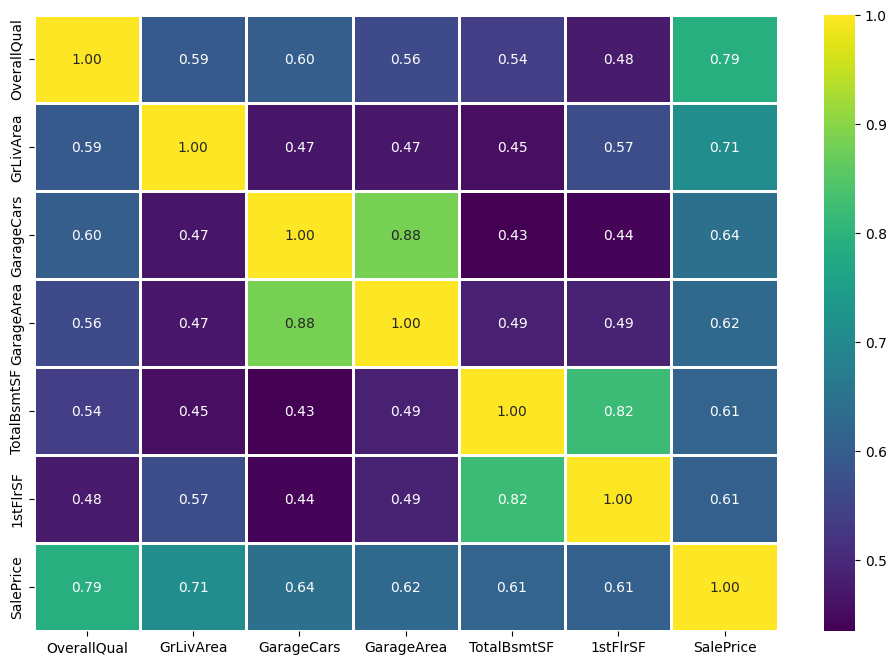

In [10]:
## Get list of features to include in heatmap (including SalePrice)
features = strong_corr.index.tolist() + ['SalePrice']
# Create a smaller correlation matrix for just these features
filtered_corr = df[features].corr()

plt.figure(figsize=(12,8))
sns.heatmap(filtered_corr, annot=True,linewidth = 1, cmap="viridis", fmt=".2f")

These features likely have strong predictive power and will be important in the model. Multicollinearity (e.g., GarageCars vs GarageArea) will be something to watch for.

###  Boxplots for Categorical Features
Helps you see which categories increase or decrease price.

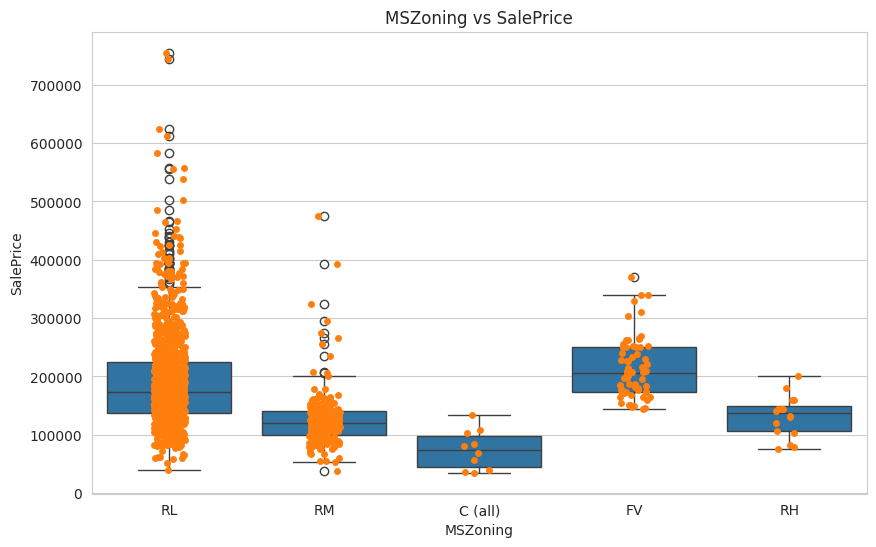

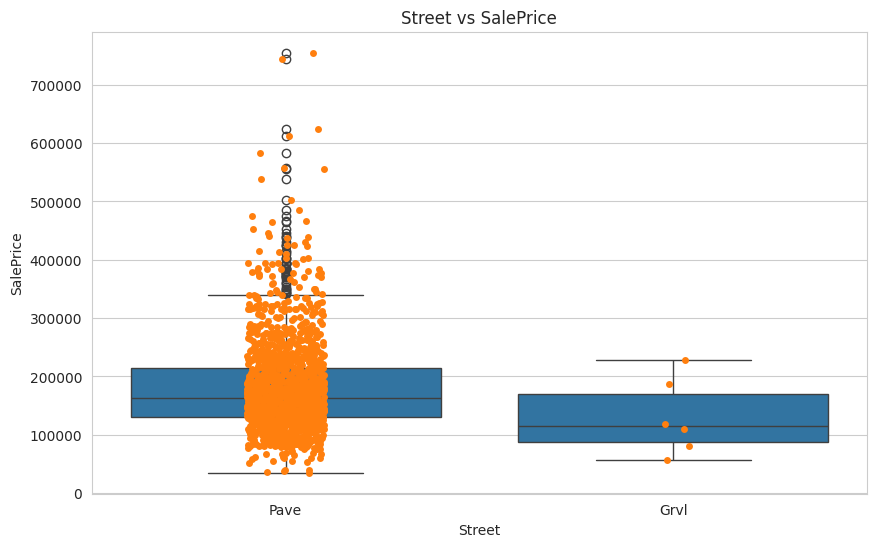

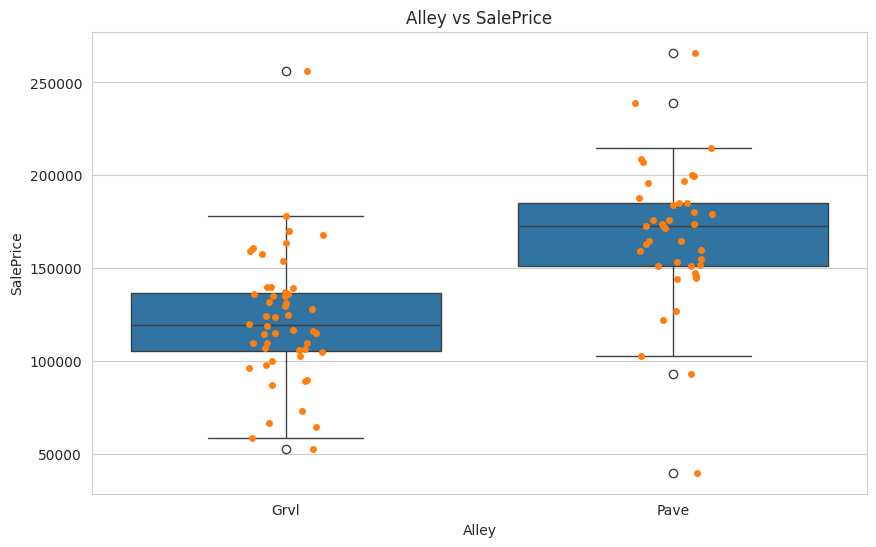

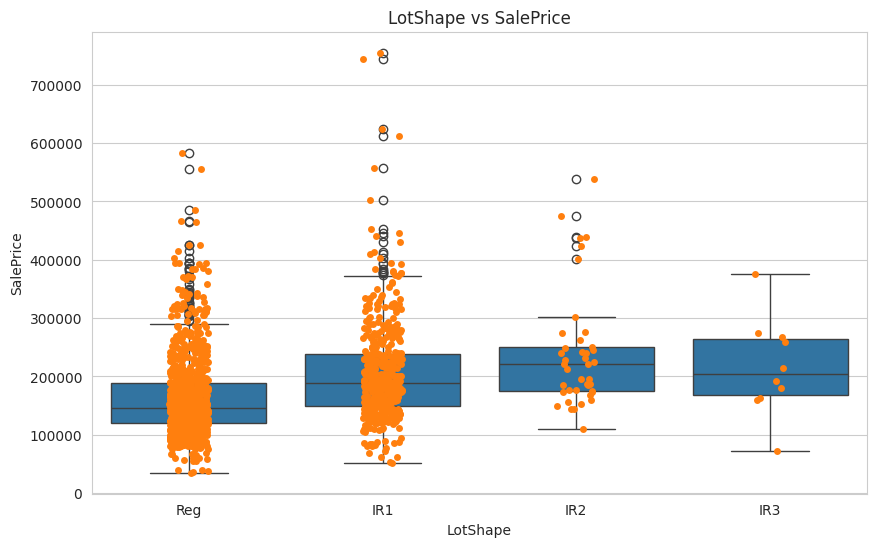

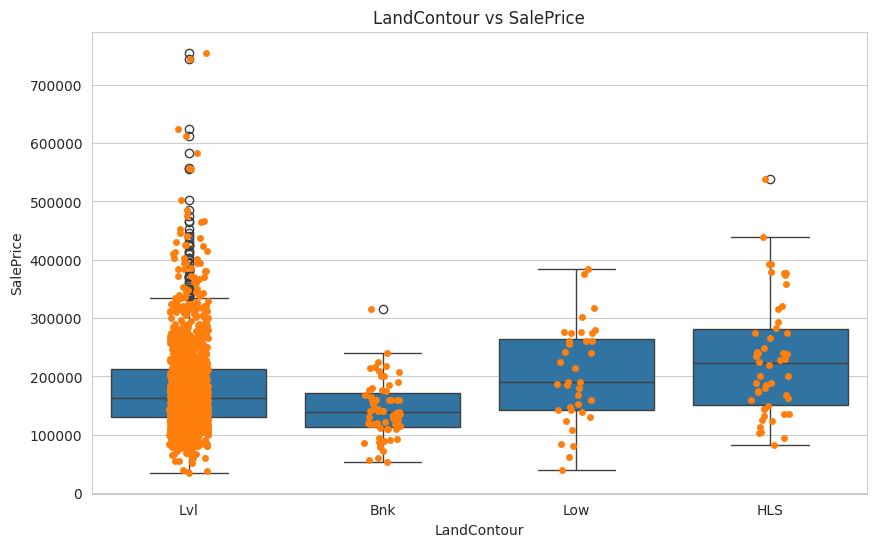

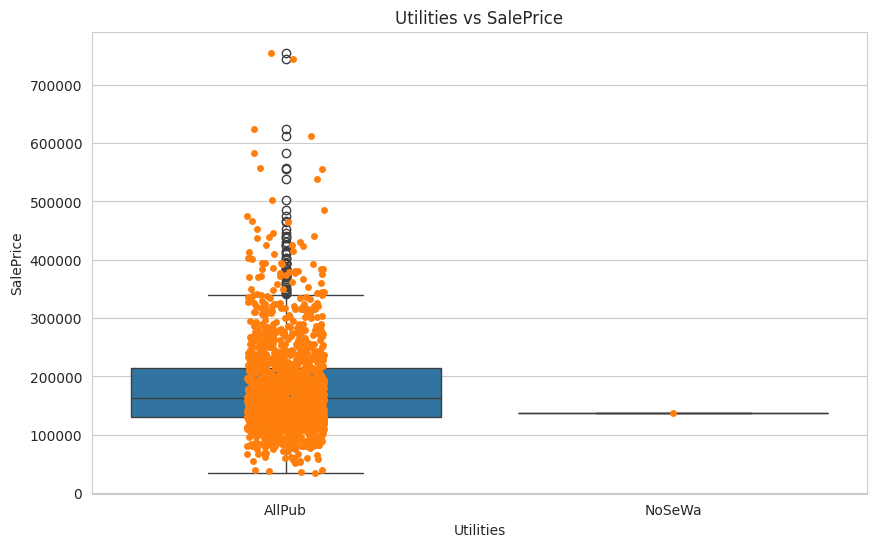

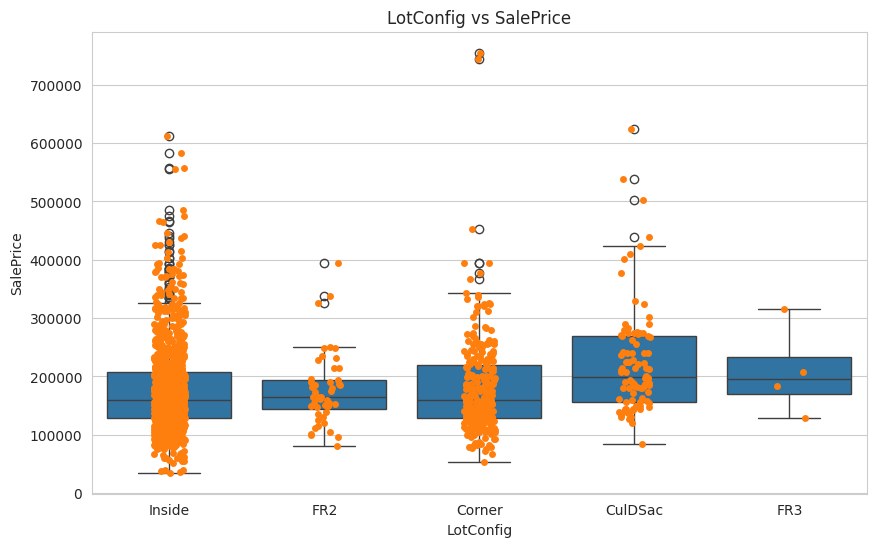

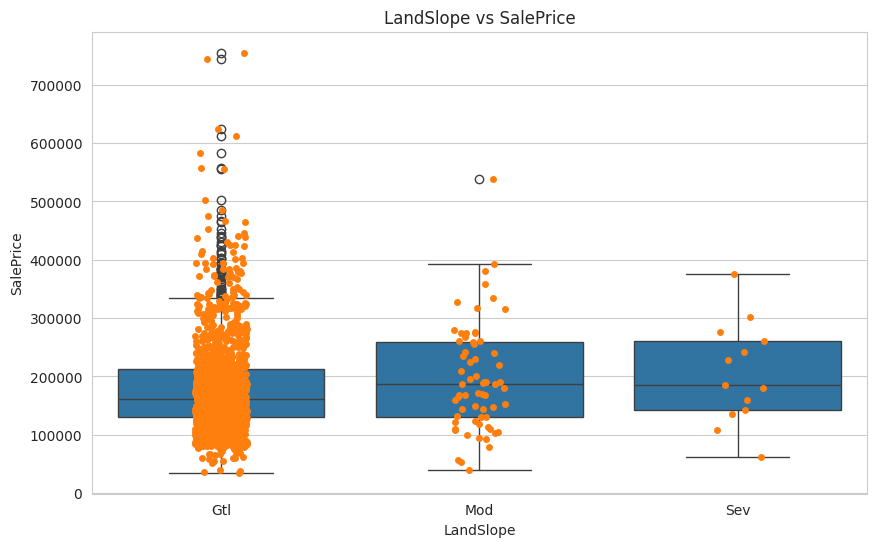

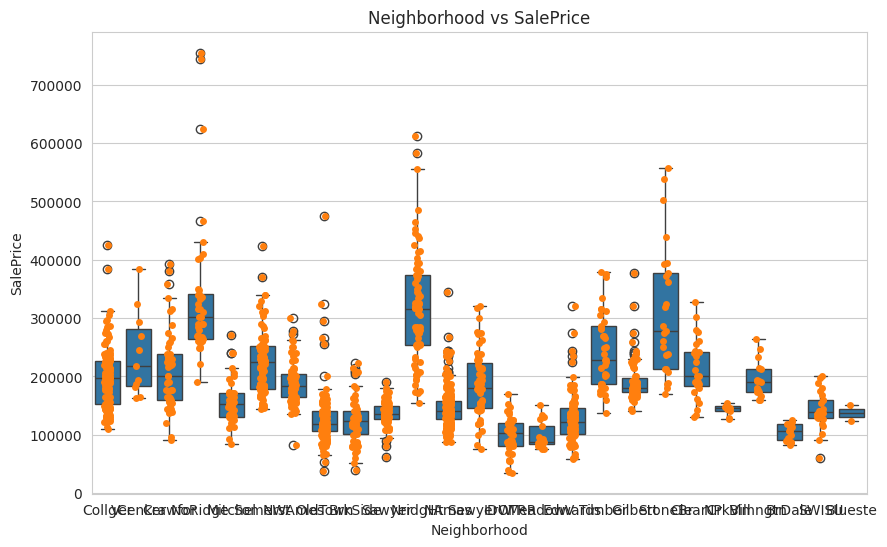

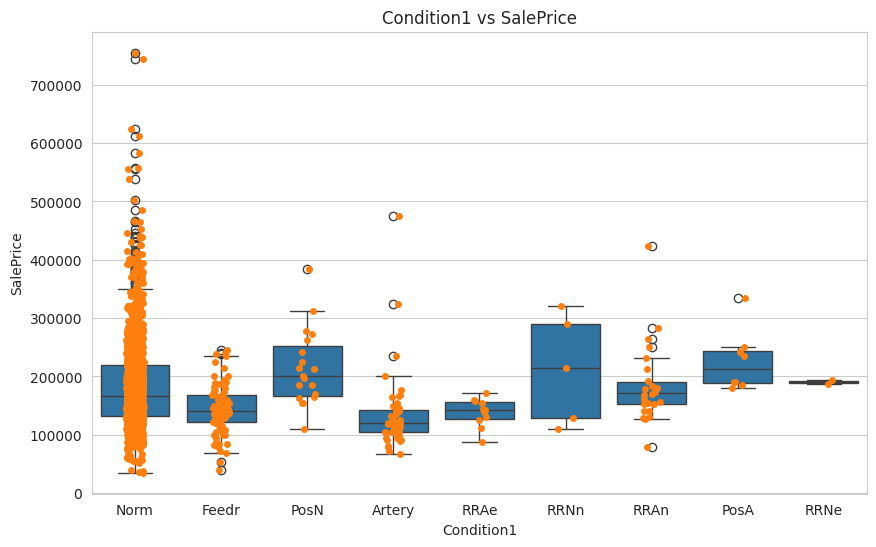

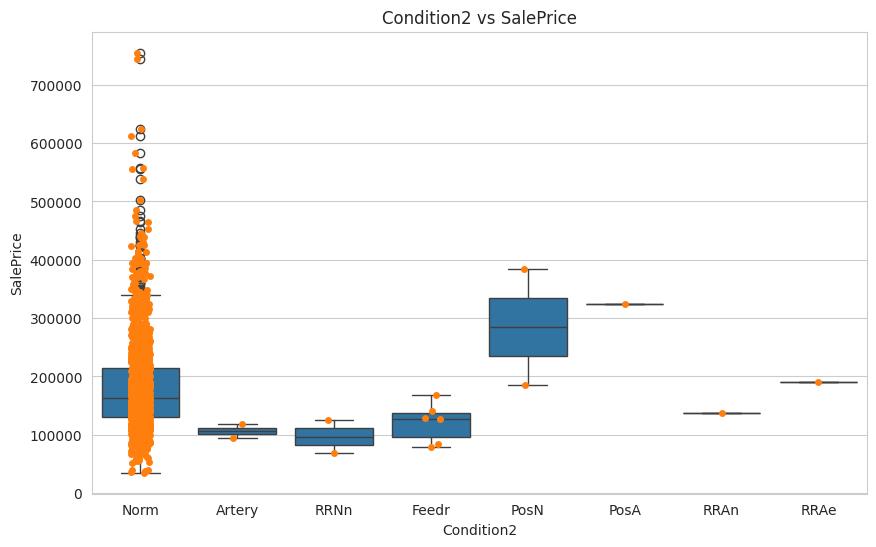

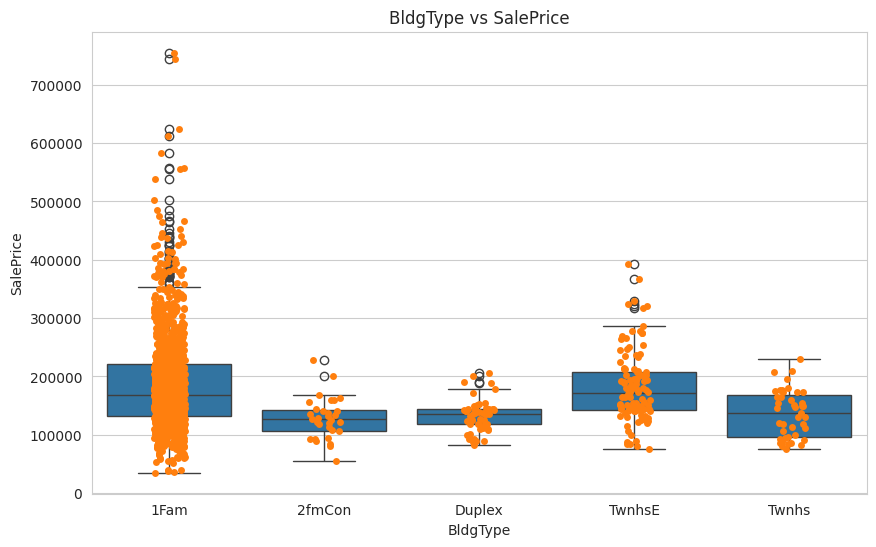

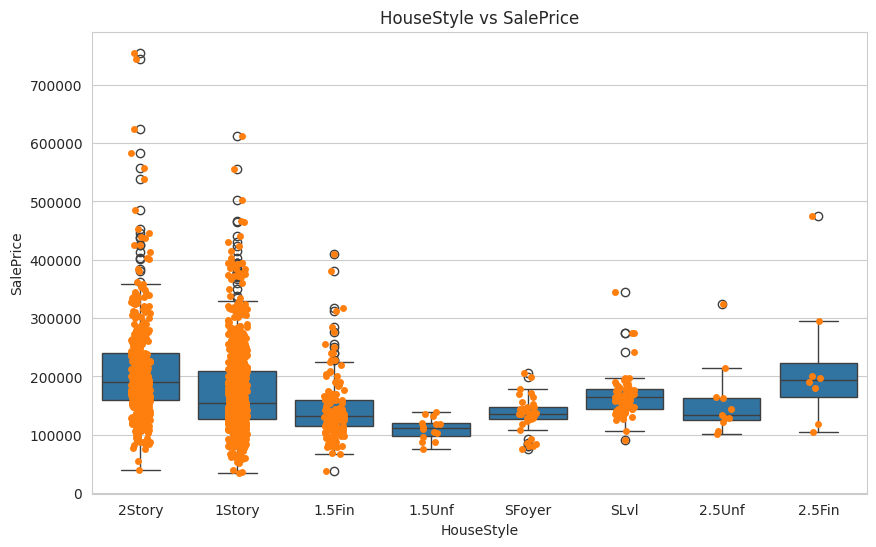

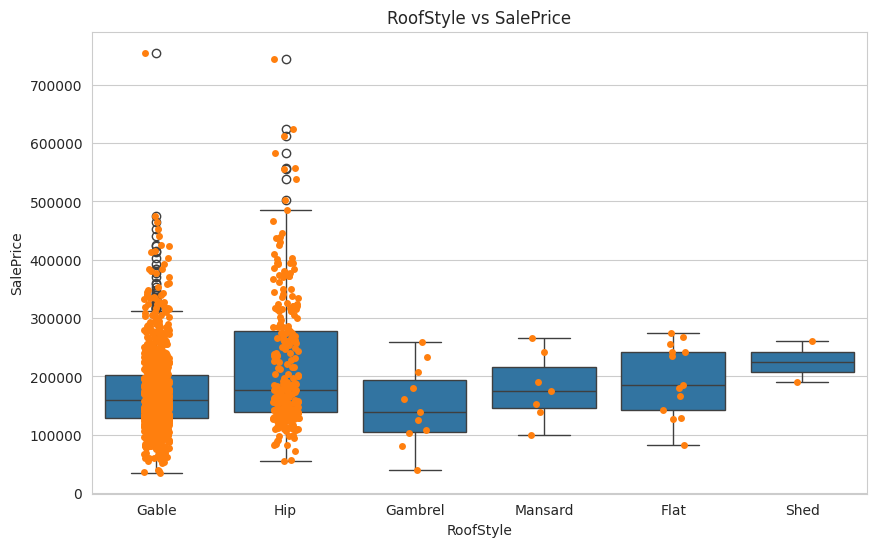

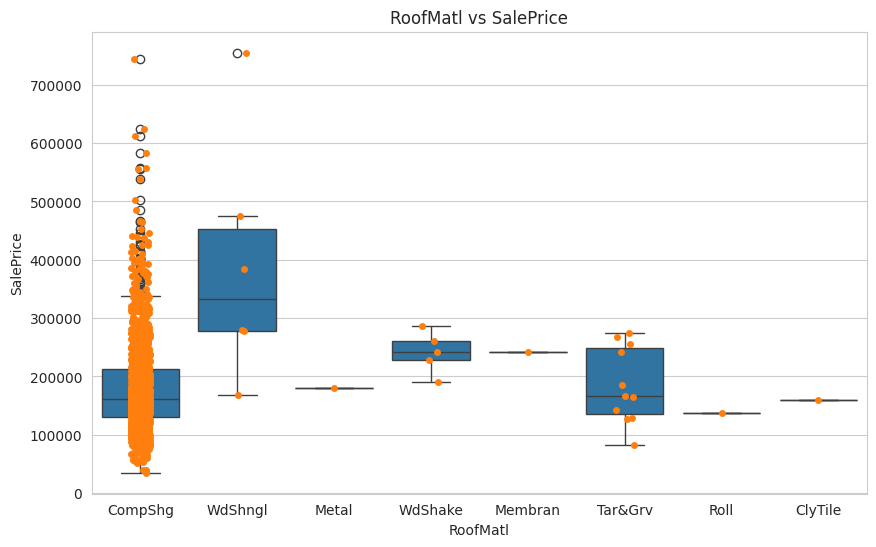

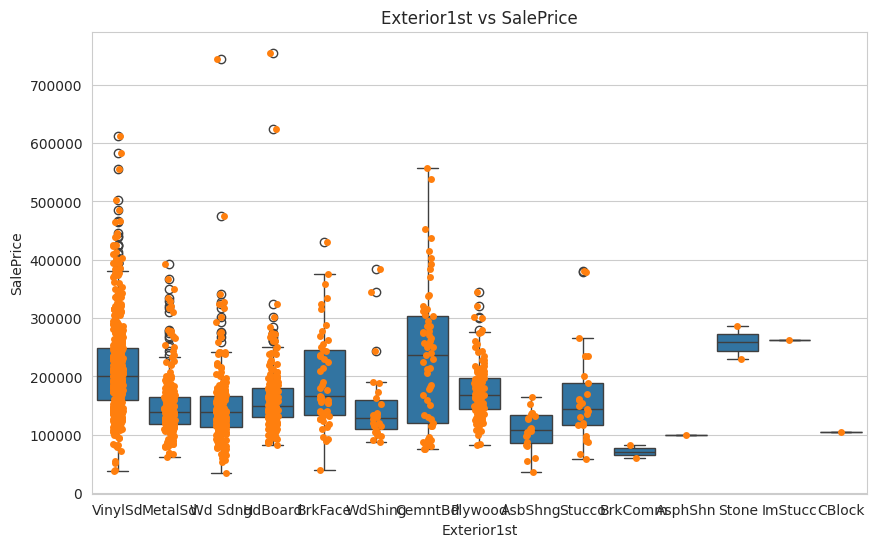

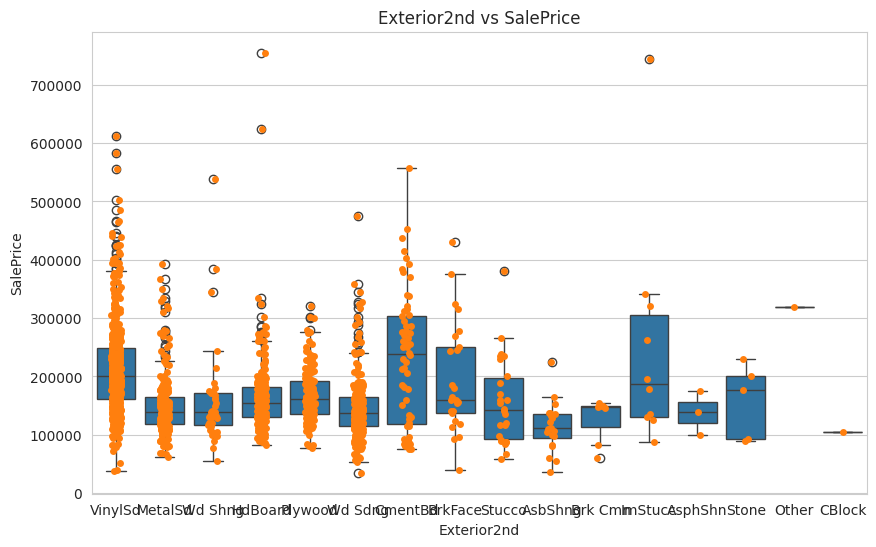

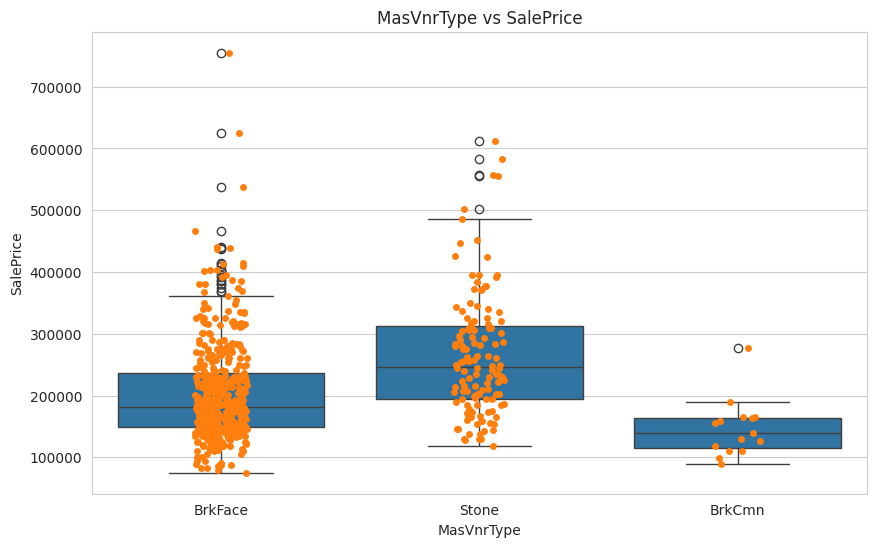

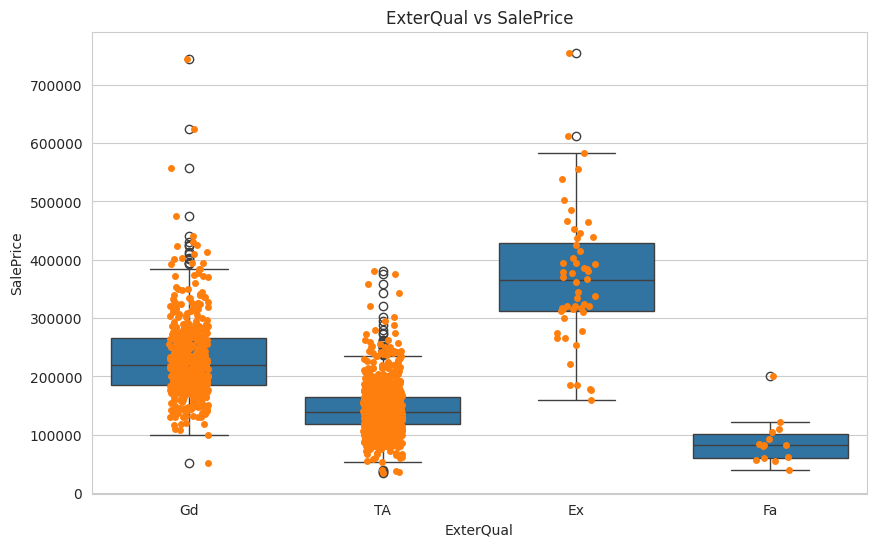

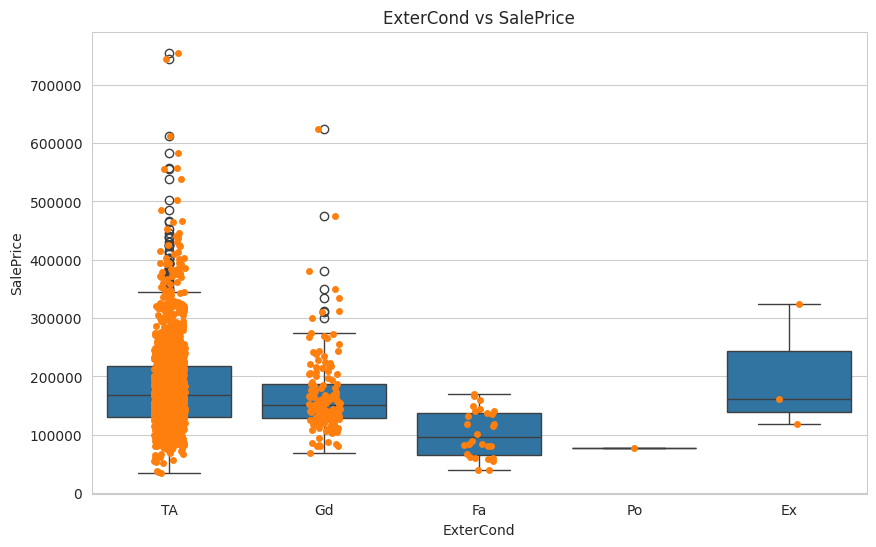

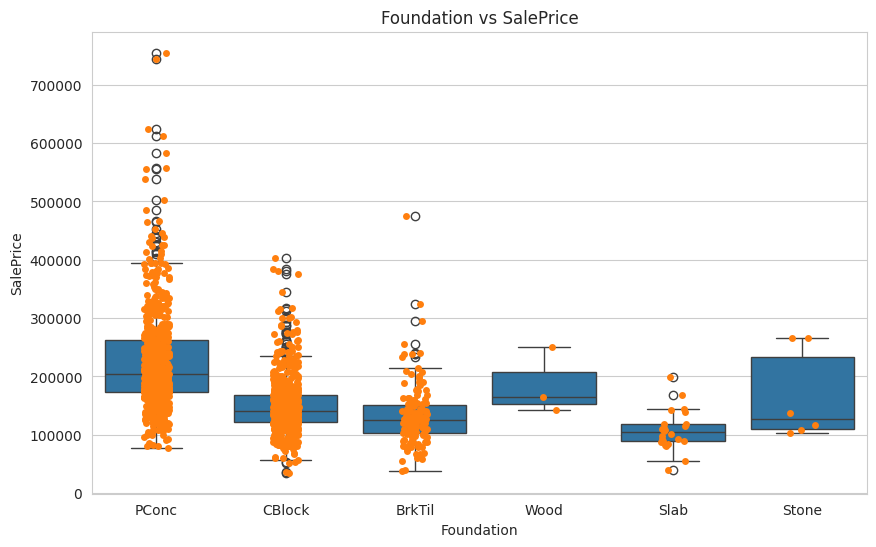

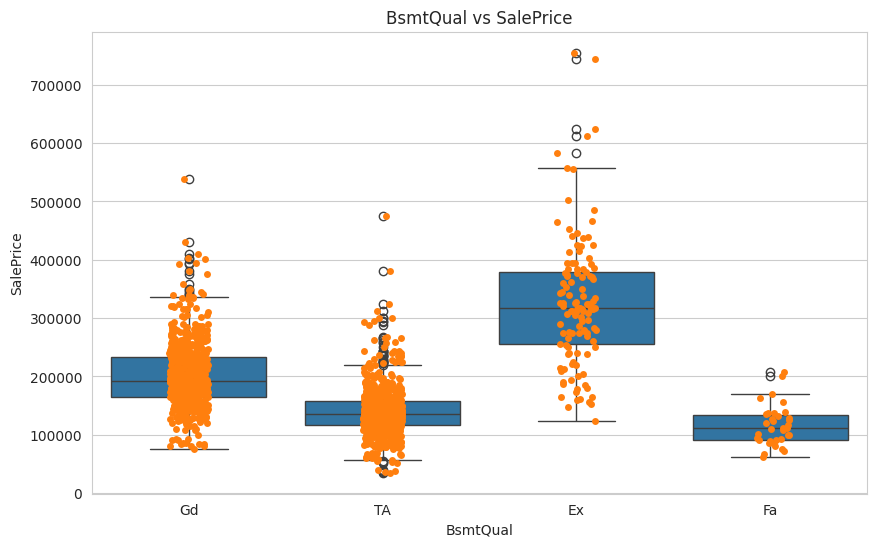

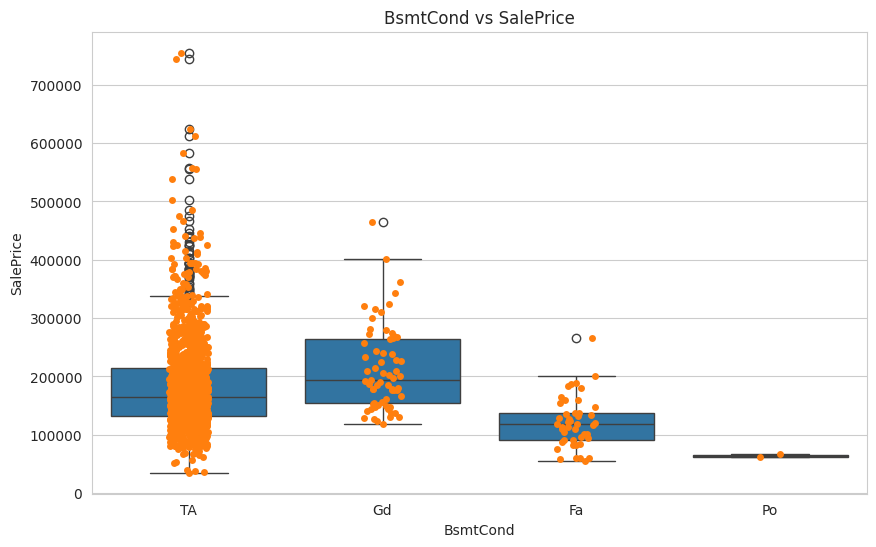

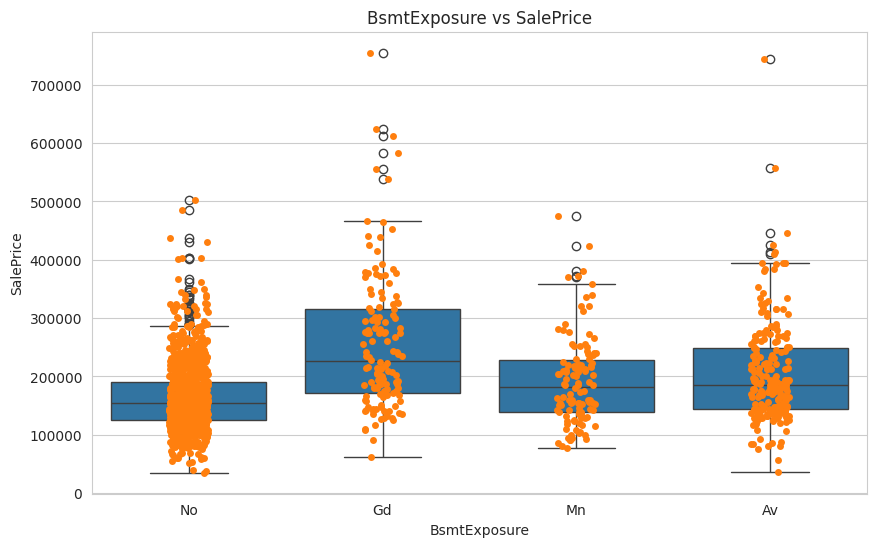

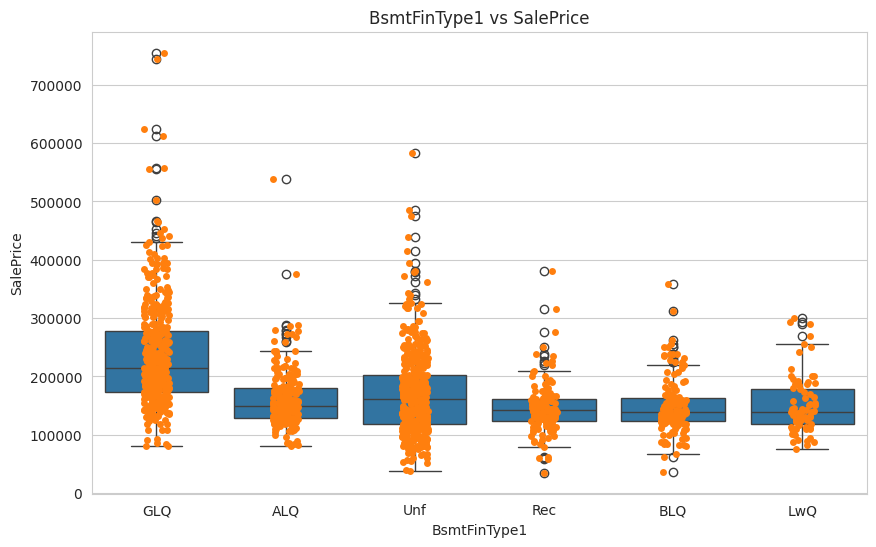

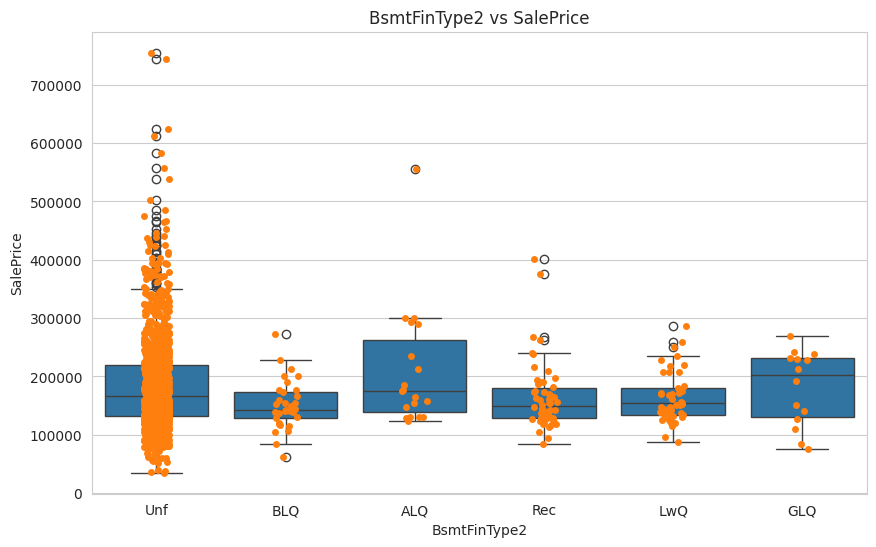

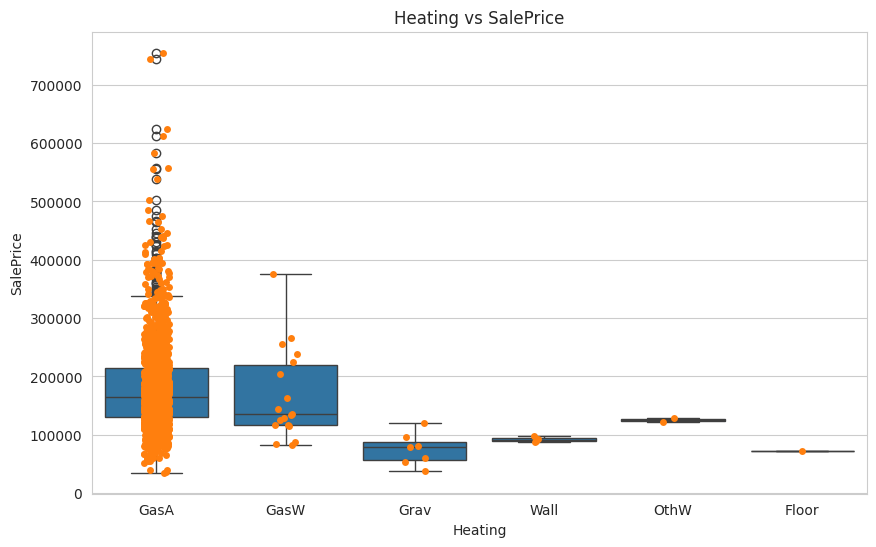

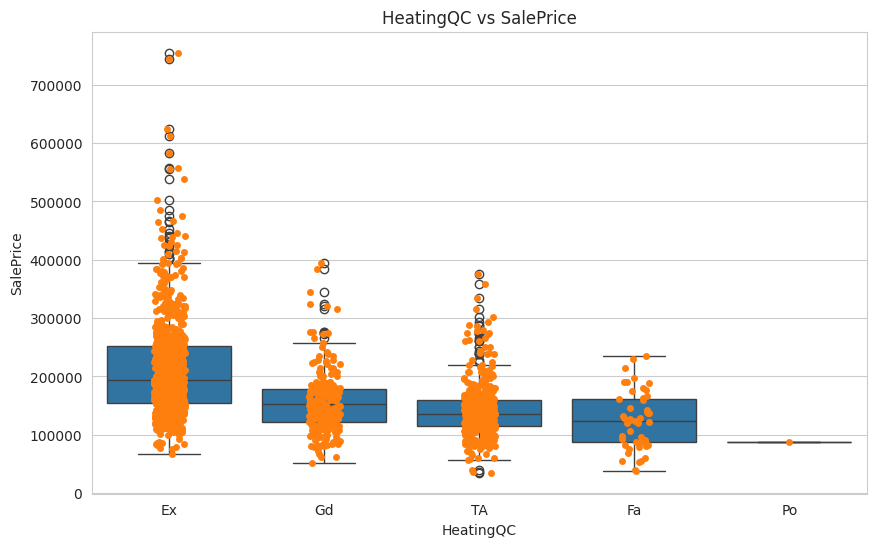

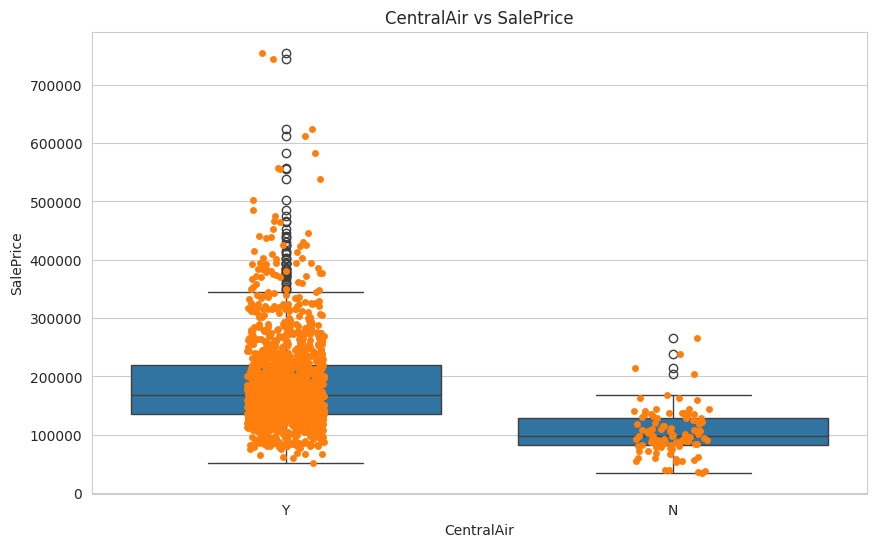

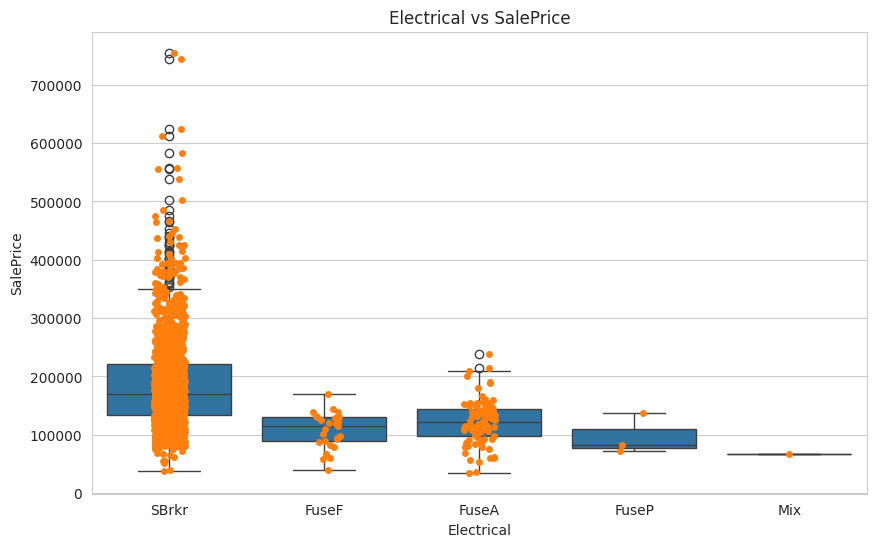

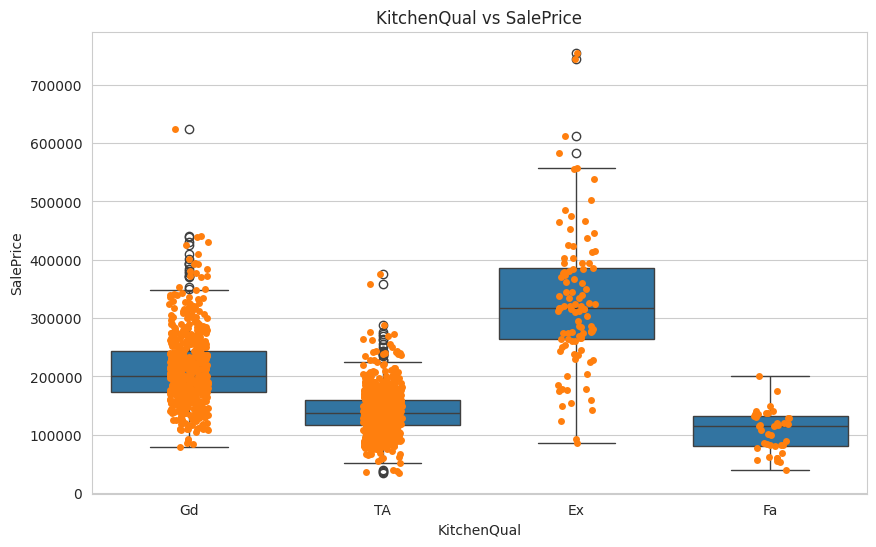

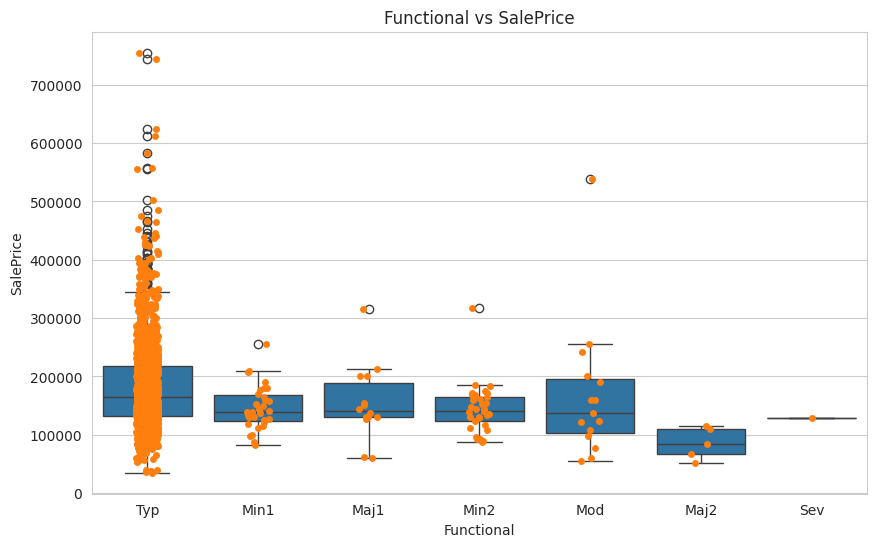

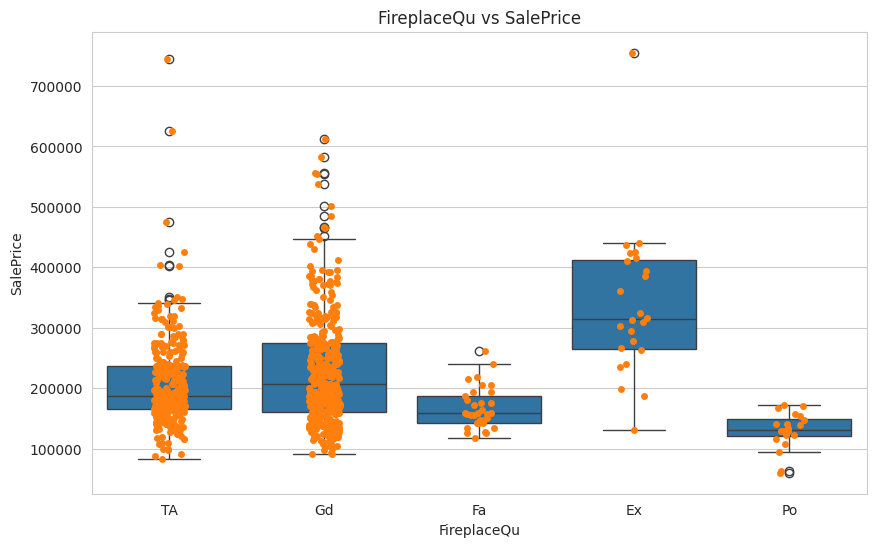

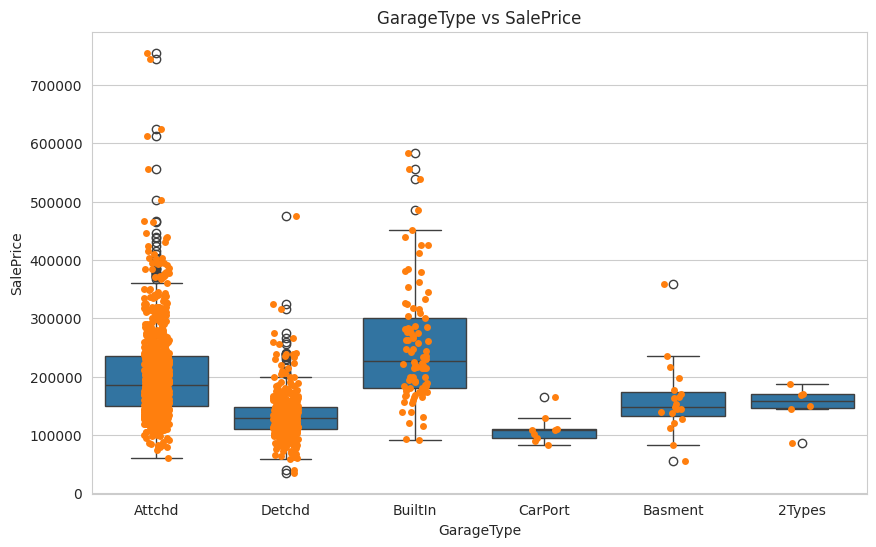

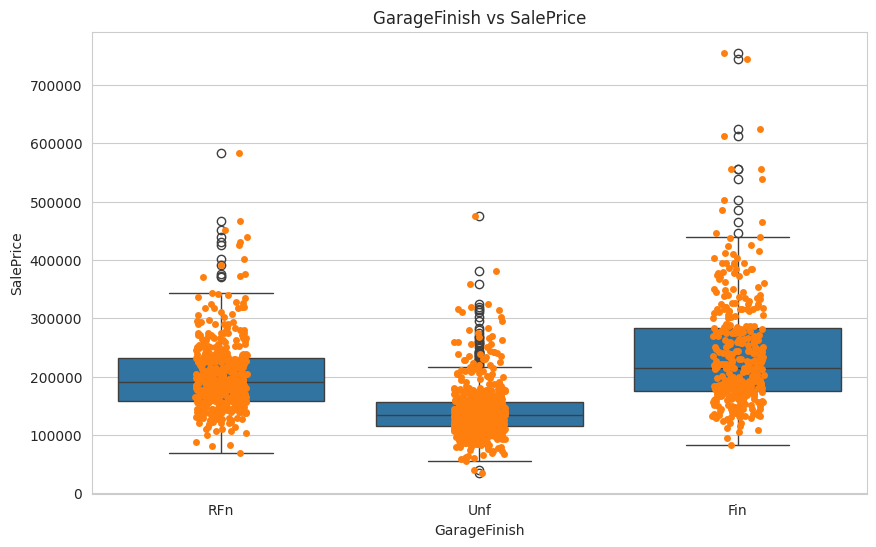

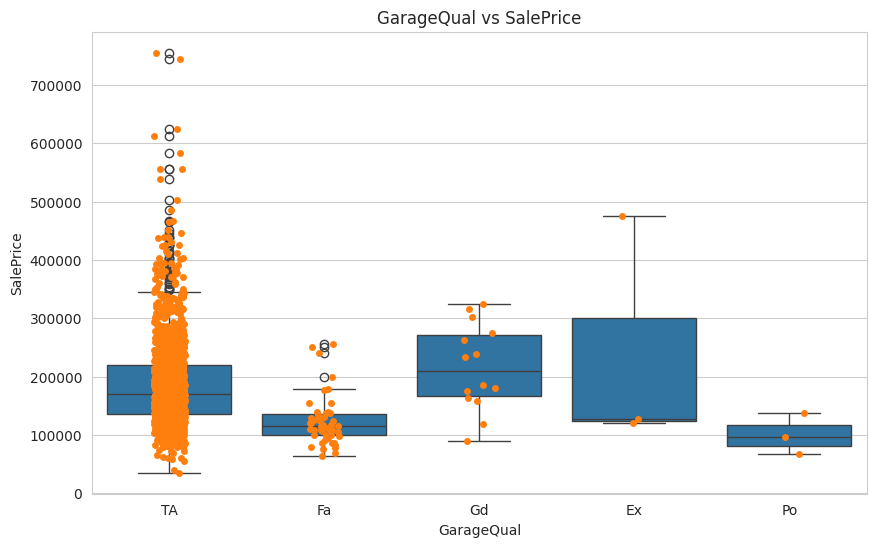

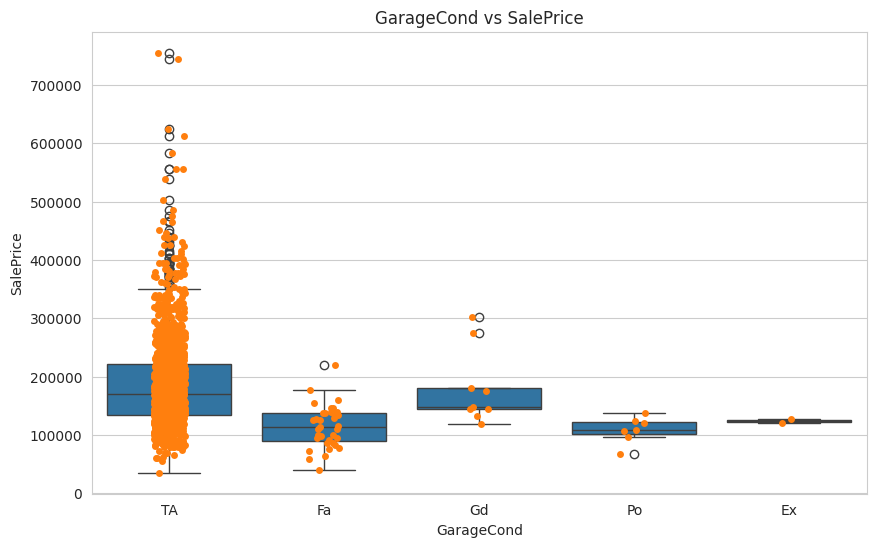

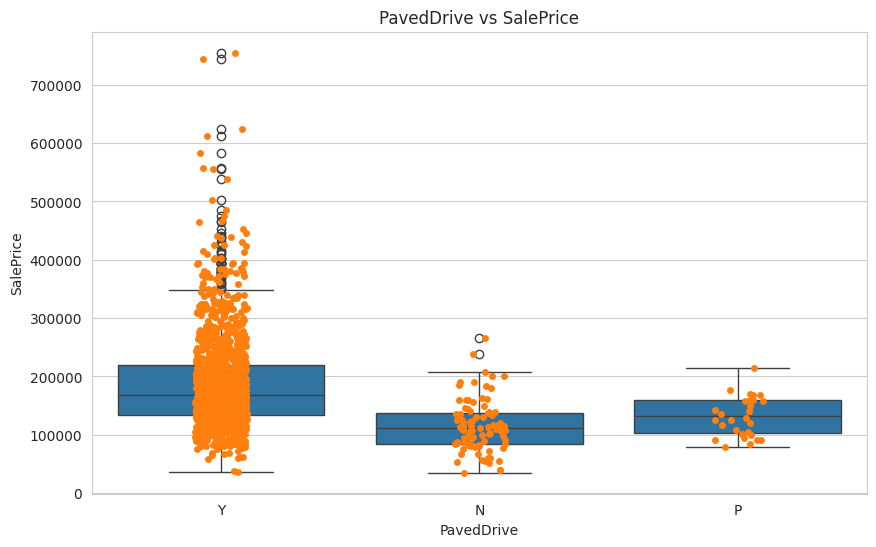

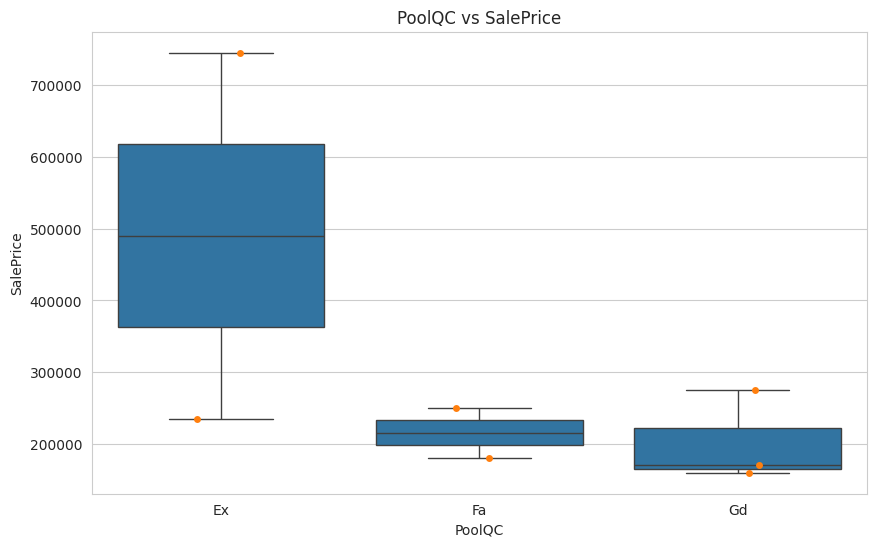

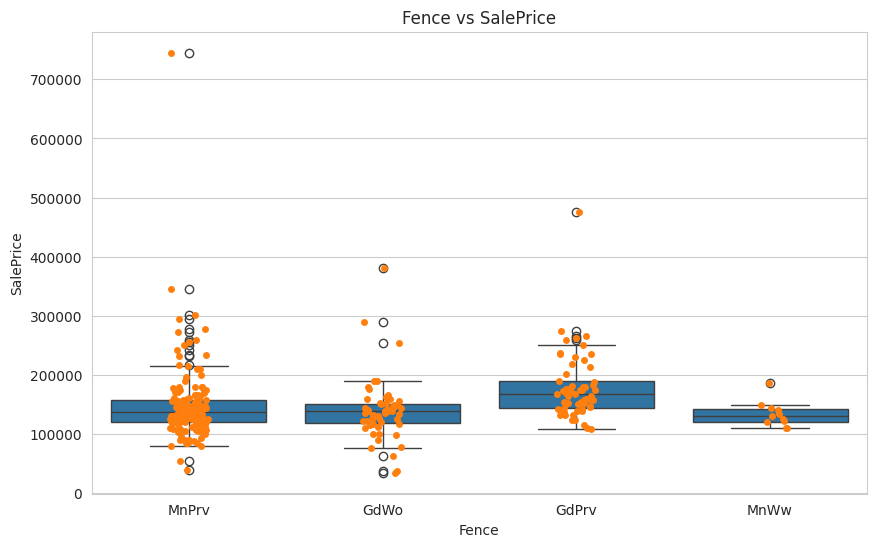

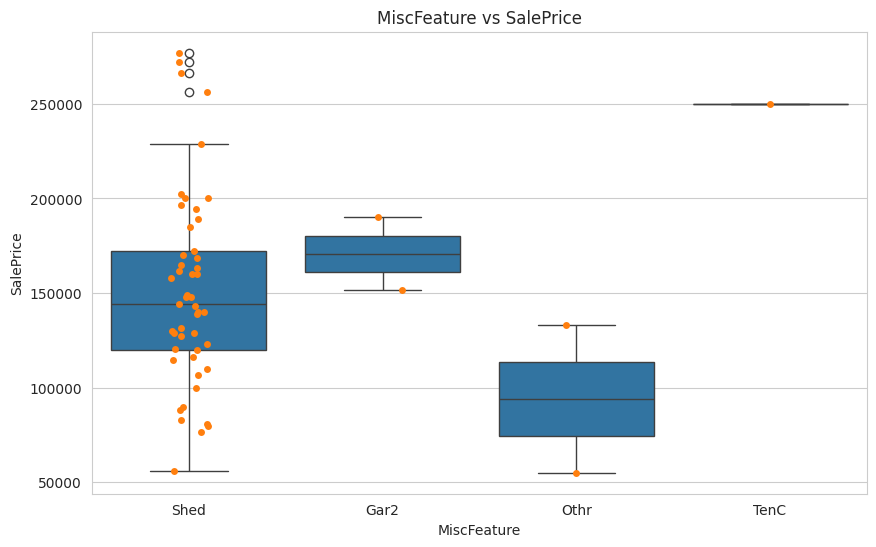

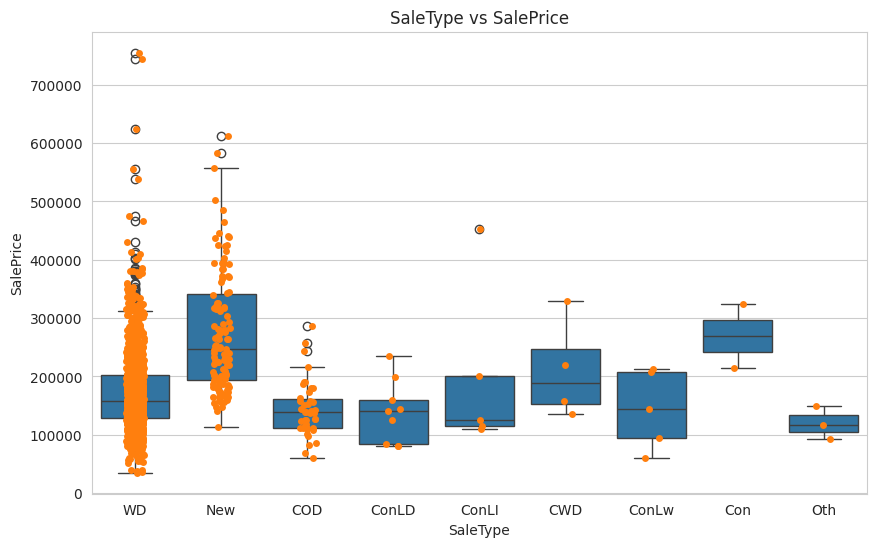

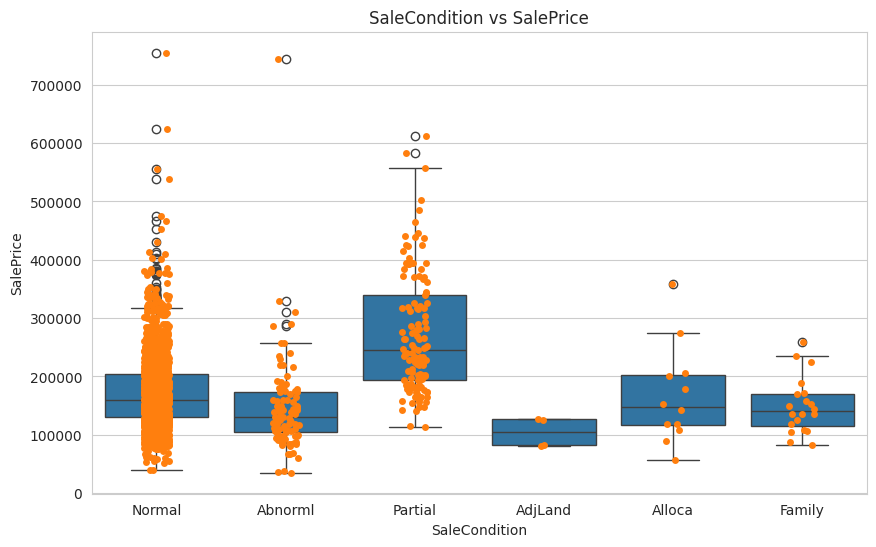

In [11]:
for col in df.select_dtypes(include='object'):
  plt.figure(figsize=(10,6))
  sns.set_style('whitegrid')
  sns.boxplot(data=df, x=col, y='SalePrice')
  sns.stripplot(data=df, x=col, y='SalePrice')
  plt.title(f'{col} vs SalePrice')
  plt.show()

Most median prices ranges around 200,000$

But for Neighnorhoood and Roof Material median price seems to be higher - between 300,000 and 330,000

Boxplots helped identify which categorical features have strong separation in price and which ones might be irrelevant (e.g., if all medians are similar).

### Scatterplots for Numeric Features with High Correlation


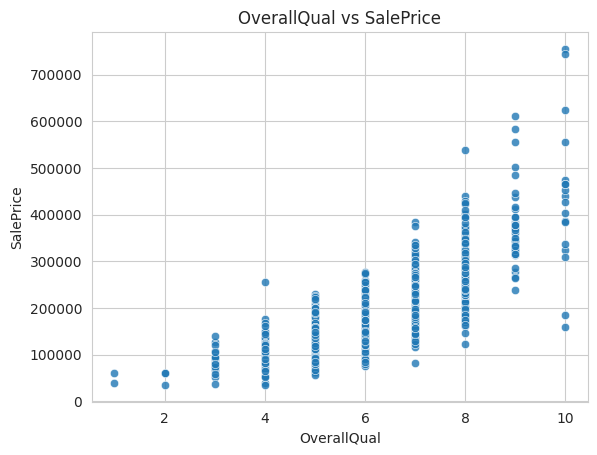

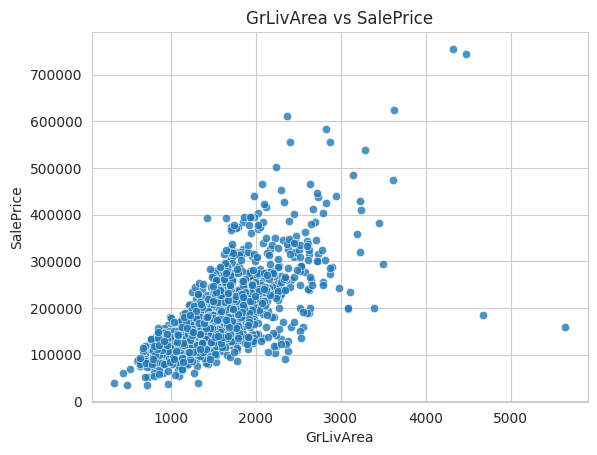

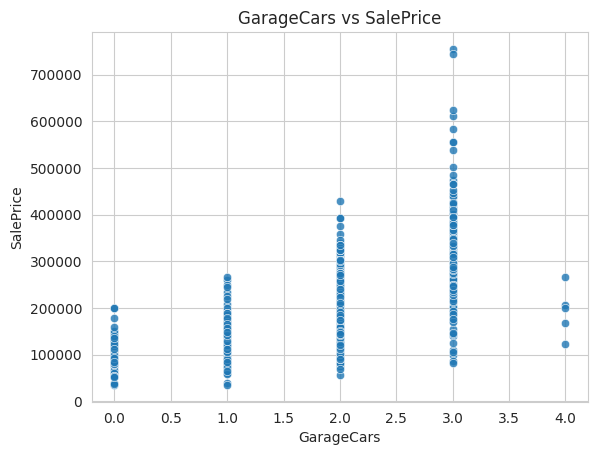

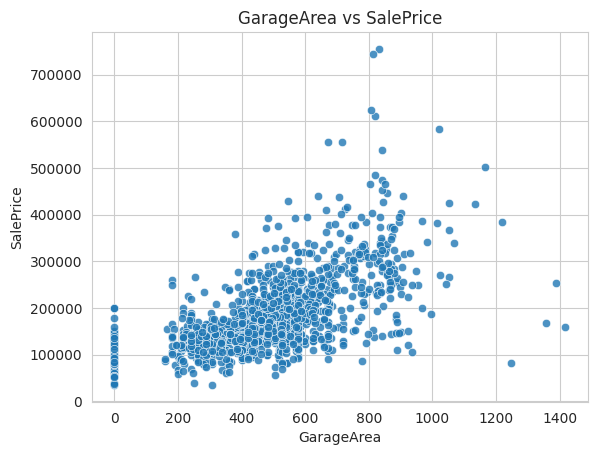

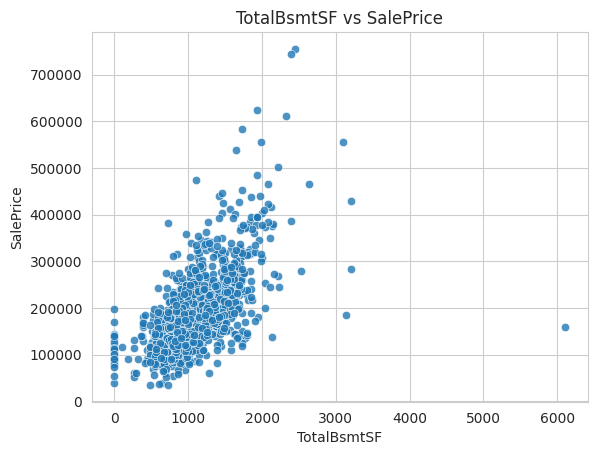

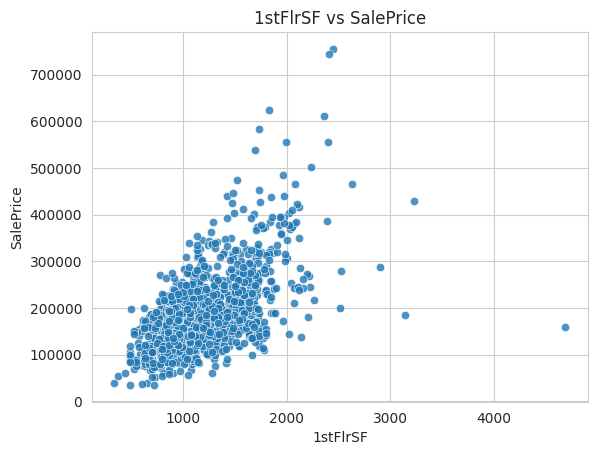

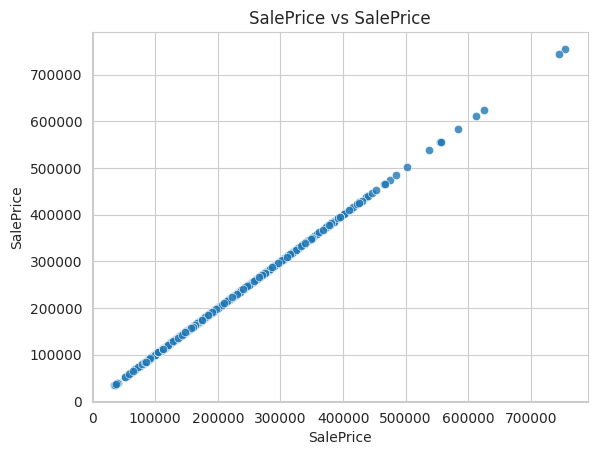

In [12]:
for col in features:
  sns.scatterplot(x=col,y='SalePrice', data=df,alpha=0.8)
  plt.title(f'{col} vs SalePrice')
  plt.show()

Most of them have a positive linear relationship, except GarageCar - until 4 cars the prices tend to go higher with the increase of cars - *potential outliers*

### Missing Values Analysis

array([[<Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>,
        <Axes: title={'center': 'YearBuilt'}>],
       [<Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>,
        <Axes: title={'center': 'TotalBsmtSF'}>],
       [<Axes: title={'center': '1stFlrSF'}>,
        <Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>,
        <Axes: title={'center': 'BsmtHalfBath'}>],
       [<Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'HalfBath'}>,
        <Axes: title={'center': 'Bedroo

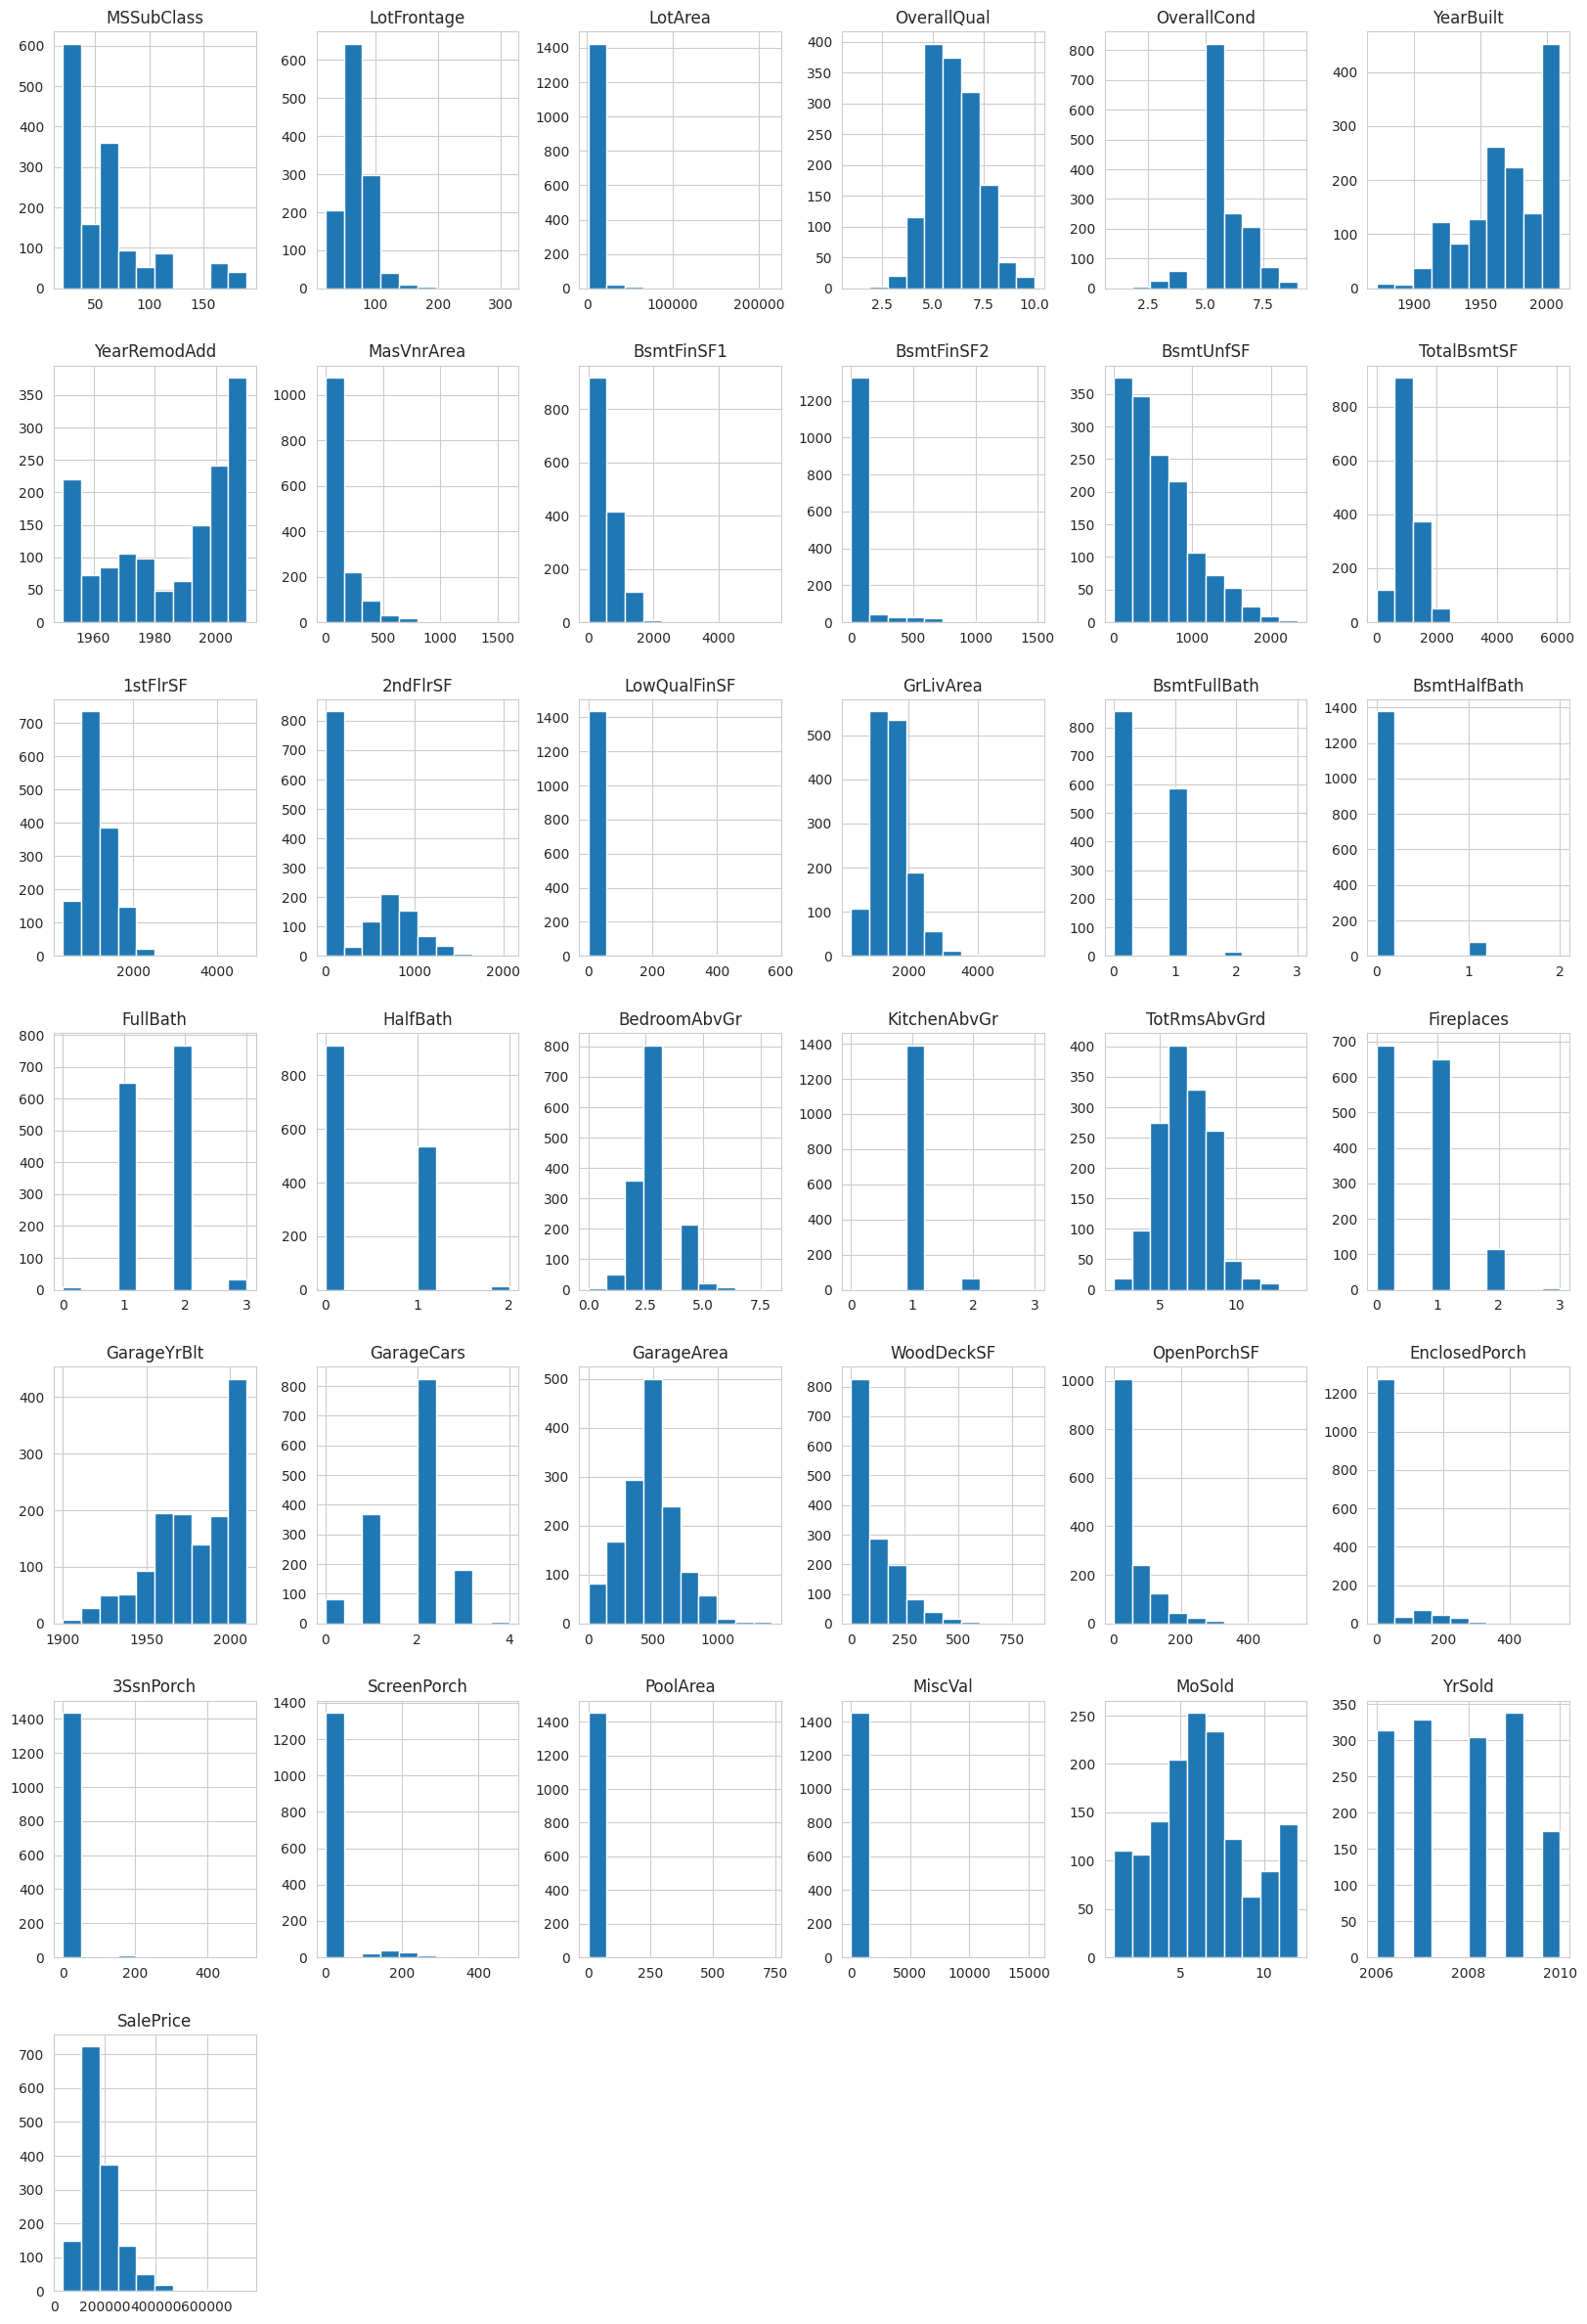

In [13]:
df.hist(figsize=(20,30))

# Checking for missing values

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

1. We can onserve in columns like : *Fence, MiscFeature, PoolQC and Alley* almost all values are null, so we can drop this columns and also they dont really important and will not help to predict the house price

In [15]:
df = df.drop(columns=['Fence', 'MiscFeature', 'PoolQC', 'Alley'], axis=1)
df.shape

(1460, 76)

Succesfully dropped 4 columns

#  Feature Engineering

The process of selecting, transforming, extracting, and creating new variables from raw data to improve the performance of machine learning models.

We can create some new features using original ones and them drop them to avoid **Multicollinearity** (correlation between independent variables) and due to **Irrelevance** - features with No Predictive Power

## 1. Total Square Footage

In [16]:
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']

## 2. House Age Features

In [17]:
df['HoiseAge'] = df['YrSold'] - df['YearBuilt']
df['HouseRemodelAge'] = df['YrSold'] - df['YearRemodAdd']
df['GarageAge'] = df['YrSold'] - df['GarageYrBlt']

## 3. Bathrooms Count

Combine full and half baths into a single numeric(to standardize their contribution to a single, continuous numerical representation of bathing facilities.)

In [18]:
df['BathroomCount']  = df['FullBath']  + 0.5* df['HalfBath']
df['BsmtBathroomCount'] = df['BsmtFullBath'] + 0.5* df['BsmtHalfBath']

##  4. Interaction Features

 Interaction Features are valuable because they improve model by allowing to capture how their combined effect influence a target variable

In [19]:
df['OverallQual_GrLiv'] = df['OverallQual'] * df['GrLivArea'] # - the product of the house's living area and its overall quality.
df['GarageCars_x_Area'] = df['GarageCars']  * df['GarageArea'] # - the product of the garage's area and its cars capacity

## 5. Porch Area
Sum all porch-related features


In [20]:
df['PorchArea'] = df['OpenPorchSF']  + df['EnclosedPorch'] + df['3SsnPorch'] + df['ScreenPorch']

Now we can drop original columns used in creating new features

In [21]:
df = df.drop(columns=['OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch','OverallQual', 'GrLivArea',  'GarageCars', 'GarageArea','FullBath', 'HalfBath',
                 'BsmtFullBath', 'BsmtHalfBath','YrSold',  'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF'],axis=1)

For other columns we can use imputer to replace missing values

But before, we need to create a numeric and categorical cols to impute

In [22]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categ_cols = df.select_dtypes(include=['object']).columns.tolist()

In [23]:
df[numeric_cols].isna().sum()

MSSubClass             0
LotFrontage          259
LotArea                0
OverallCond            0
MasVnrArea             8
BsmtFinSF1             0
BsmtFinSF2             0
BsmtUnfSF              0
LowQualFinSF           0
BedroomAbvGr           0
KitchenAbvGr           0
TotRmsAbvGrd           0
Fireplaces             0
WoodDeckSF             0
PoolArea               0
MiscVal                0
MoSold                 0
SalePrice              0
TotalSF                0
HoiseAge               0
HouseRemodelAge        0
GarageAge             81
BathroomCount          0
BsmtBathroomCount      0
OverallQual_GrLiv      0
GarageCars_x_Area      0
PorchArea              0
dtype: int64

In [24]:
df[categ_cols].isna().sum()

MSZoning           0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType       872
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
KitchenQual        0
Functional         0
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PavedDrive         0
SaleType           0
SaleCondition      0
dtype: int64

Great, in total we still have 66 columns

Let's import *SimpleImputer* to fill missing values

In [25]:
from sklearn.impute import SimpleImputer

num_imputer = SimpleImputer(strategy='median')  # or strategy='mean'
numeric_cols_imputed = pd.DataFrame(num_imputer.fit_transform(df[numeric_cols]), columns=numeric_cols)

categ_imputer = SimpleImputer(strategy='most_frequent')
categ_cols_imputed =pd.DataFrame(categ_imputer.fit_transform(df[categ_cols]), columns=categ_cols)


In [26]:
numeric_cols_imputed.isna().sum()

MSSubClass           0
LotFrontage          0
LotArea              0
OverallCond          0
MasVnrArea           0
BsmtFinSF1           0
BsmtFinSF2           0
BsmtUnfSF            0
LowQualFinSF         0
BedroomAbvGr         0
KitchenAbvGr         0
TotRmsAbvGrd         0
Fireplaces           0
WoodDeckSF           0
PoolArea             0
MiscVal              0
MoSold               0
SalePrice            0
TotalSF              0
HoiseAge             0
HouseRemodelAge      0
GarageAge            0
BathroomCount        0
BsmtBathroomCount    0
OverallQual_GrLiv    0
GarageCars_x_Area    0
PorchArea            0
dtype: int64

In [27]:
categ_cols_imputed.isna().sum()

MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
dtype: int64

We can see that we filled all missing values in our numeric and categ cols, so now let's merge them in one updated df

In [28]:
df_imputed =pd.concat([numeric_cols_imputed, categ_cols_imputed], axis=1)
print(df_imputed.shape)

df_imputed.info()

(1460, 66)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 66 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MSSubClass         1460 non-null   float64
 1   LotFrontage        1460 non-null   float64
 2   LotArea            1460 non-null   float64
 3   OverallCond        1460 non-null   float64
 4   MasVnrArea         1460 non-null   float64
 5   BsmtFinSF1         1460 non-null   float64
 6   BsmtFinSF2         1460 non-null   float64
 7   BsmtUnfSF          1460 non-null   float64
 8   LowQualFinSF       1460 non-null   float64
 9   BedroomAbvGr       1460 non-null   float64
 10  KitchenAbvGr       1460 non-null   float64
 11  TotRmsAbvGrd       1460 non-null   float64
 12  Fireplaces         1460 non-null   float64
 13  WoodDeckSF         1460 non-null   float64
 14  PoolArea           1460 non-null   float64
 15  MiscVal            1460 non-null   float64
 16  MoSold       

# Train & Test Datasets
Now, we want to create our train and test partitions. Use scikit-learn to split up X and y into a training set and test set. Since we will later be using a Grid Search strategy, set the test proportion to 20% of the total population. To get the same data split as the solutions notebook, you can specify random_state = 77.

In [29]:
from sklearn.model_selection import train_test_split

But before we need to separate out the data into *X* - features and *Y* - label

In [30]:
X = df_imputed.drop(columns=['SalePrice'])
y = df_imputed['SalePrice']

Now we can split our data into train and test datasets

In [31]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=77)

print(f"x_train shape : {x_train.shape}")
print(f"x_test shape : {x_test.shape}")

x_train shape : (1168, 65)
x_test shape : (292, 65)


# One-hot Encoding
In our datset some categorical columns contain more than 3 values, so we'll need to use hot encoding and create a new column for each value

**One-hot Encoding** - a technique used to represent categorical data in a numerical format that machine learning algorithms can easily process. It transforms categorical variables into a binary matrix, where each unique category is represented by a binary vector with a single 1 and the rest 0s.

In [32]:
df_imputed.Neighborhood.unique()

array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'], dtype=object)

For example, in Neighborhood column we have 25 types of Neighborhoods, so using One-hot Encoding will transform categorical values to numeric

In [33]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Fitting the encoder on training categorical columns
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoder.fit(x_train[categ_cols])

# Getting encoded column names
encoded_cols = encoder.get_feature_names_out(categ_cols)

# Transform train and test datas and wrap into DataFrames
x_train_encoded = pd.DataFrame(
    encoder.transform(x_train[categ_cols]),
    columns=encoded_cols,
    index=x_train.index
)

x_test_encoded = pd.DataFrame(
    encoder.transform(x_test[categ_cols]),
    columns=encoded_cols,
    index=x_test.index
)

The same way we can use for numeric cols **Standard Scaler**
 - a preprocessing technique in scikit-learn that standardizes features by removing the mean and scaling to unit variance. This process transforms the data to have a mean of 0 and a standard deviation of 1, also known as z-score normalization.

 Best for: Linear regression, logistic regression, SVM

 Also, in our numeric cols we still have the our taregt variable - *SalePrice*, so we need to use only numeric columns from our train dataset(x)

In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numeric_columns = x_train.select_dtypes(include=['int64', 'float64']).columns
numeric_columns = [col for col in numeric_columns if col != 'SalePrice']  # drop target if present
#ournumeric cols have 'SalePrice
x_train_scaled = pd.DataFrame(
    scaler.fit_transform(x_train[numeric_columns]),
    columns=numeric_columns,
    index= x_train.index
)

x_test_scaled = pd.DataFrame(
    scaler.transform(x_test[numeric_columns]),
    columns=numeric_columns,
    index= x_test.index
)

In [35]:
x_train_scaled.mean()  # should be ~0

MSSubClass           6.083414e-17
LotFrontage         -2.760349e-16
LotArea             -4.866731e-17
OverallCond         -3.041707e-16
MasVnrArea           5.779243e-17
BsmtFinSF1          -5.170902e-17
BsmtFinSF2          -1.140640e-17
BsmtUnfSF           -1.216683e-17
LowQualFinSF        -1.140640e-17
BedroomAbvGr        -2.387740e-16
KitchenAbvGr        -3.315461e-16
TotRmsAbvGrd        -1.490436e-16
Fireplaces           3.802134e-17
WoodDeckSF           8.364694e-17
PoolArea             3.041707e-18
MiscVal              1.140640e-17
MoSold               1.581688e-16
TotalSF             -1.216683e-17
HoiseAge            -9.733462e-17
HouseRemodelAge      1.672939e-17
GarageAge            5.170902e-17
BathroomCount        1.460019e-16
BsmtBathroomCount    3.345878e-17
OverallQual_GrLiv    1.125432e-16
GarageCars_x_Area   -8.212609e-17
PorchArea            2.927643e-17
dtype: float64

In [36]:
x_train_scaled.std()

MSSubClass           1.000428
LotFrontage          1.000428
LotArea              1.000428
OverallCond          1.000428
MasVnrArea           1.000428
BsmtFinSF1           1.000428
BsmtFinSF2           1.000428
BsmtUnfSF            1.000428
LowQualFinSF         1.000428
BedroomAbvGr         1.000428
KitchenAbvGr         1.000428
TotRmsAbvGrd         1.000428
Fireplaces           1.000428
WoodDeckSF           1.000428
PoolArea             1.000428
MiscVal              1.000428
MoSold               1.000428
TotalSF              1.000428
HoiseAge             1.000428
HouseRemodelAge      1.000428
GarageAge            1.000428
BathroomCount        1.000428
BsmtBathroomCount    1.000428
OverallQual_GrLiv    1.000428
GarageCars_x_Area    1.000428
PorchArea            1.000428
dtype: float64

Output shows your standard scaling worked exactly as expected.

*x_train_scaled.mean()*
All values are very close to 0 (on the order of e−17 or smaller).

*x_train_scaled.std()*
All standard deviations are ≈ 1.000428.

### We can now safely combine x_train_scaled and x_train_encoded
Numeric features are properly standardized and Categorical features are OneHotEncoded.

In [37]:
X_train = pd.concat([x_train_scaled, x_train_encoded], axis=1)
X_test = pd.concat([x_test_scaled, x_test_encoded], axis=1)

# Default Regression Model
We
1. Imputed missing values
2. One-hot encoded categorical columns
3. Scaled numerical features
4. Combined them into X_train and X_test

Let's create a regression eastimators.

First one will be Default Linear Regression just to check how it perfoms and then we will use an Elastic Net model.

**ElasticNet** is a regularized regression method in scikit-learn that combines the penalties of both Lasso (L1) and Ridge (L2) regression methods.

Why we use ElasticNet? Because

1.  We have *High-dimensional data* - working with large amount of features, and this is one of the main advantages

2. *Regression tasks* Elastic Netzis a regression fitting method aimed predominantly at linear regression models where the goal is to find relationships between input features and a continuous target variable.


*But for now, ket's just apply basic linear regression with multiple variables*


In [38]:
X_train.shape

(1168, 260)

In [39]:
X_train

MSSubClass  LotFrontage   LotArea  OverallCond  MasVnrArea  BsmtFinSF1  \
676     0.312610    -0.440392 -0.092590    -3.204196   -0.566289   -0.958636   
61      0.431120    -0.440392 -0.333548     1.270339   -0.566289   -0.958636   
1017    1.497708    -0.032551 -0.472702    -0.519475   -0.566289    1.302921   
1011    0.786649     0.239343 -0.070000    -0.519475   -0.566289   -0.958636   
569     0.786649    -0.032551 -0.350415    -0.519475   -0.566289    1.099905   
...          ...          ...       ...          ...         ...         ...   
927     0.075591    -0.032551 -0.062470    -0.519475    1.328755    0.246364   
1317    1.497708    -1.029496 -0.631734    -0.519475   -0.566289   -0.958636   
235     2.445786    -2.207703 -0.887752    -2.309289    2.780515   -0.177133   
607    -0.872488     0.375290 -0.273309     2.165246   -0.566289    0.357695   
727    -0.872488    -0.259130 -0.322103    -0.519475   -0.111922    0.621834   

      BsmtFinSF2  BsmtUnfSF  LowQualFinSF  BedroomAbvGr  KitchenAbvGr  \
676    -0.291403   1.177232     -0.100571      1.407138      4.456733   
61     -0.291403  -0.093380     -0.100571      0.163918     -0.207661   
1017   -0.291403  -0.871489     -0.100571     -2.322523     -0.207661   
1011   -0.291403  -1.285281     -0.100571      1.407138      4.456733   
569    -0.291403  -1.285281     -0.100571     -1.079303     -0.207661   
...          ...        ...           ...           ...           ...   
927    -0.291403  -0.655598     -0.100571      1.407138     -0.207661   
1317   -0.291403   1.755191     -0.100571     -1.079303     -0.207661   
235    -0.291403  -1.004173     -0.100571     -1.079303     -0.207661   
607    -0.291403  -0.626362     -0.100571      0.163918     -0.207661   
727    -0.291403  -0.142855     -0.100571     -1.079303     -0.207661   

      TotRmsAbvGrd  Fireplaces  WoodDeckSF  PoolArea   MiscVal    MoSold  \
676       0.914481   -0.954479   -0.759353 -0.071103 -0.104978 -0.476193   
61       -0.322477   -0.954479   -0.759353 -0.071103 -0.104978 -1.211412   
1017     -1.559435    0.609100   -0.252056 -0.071103 -0.104978  0.626636   
1011      0.914481   -0.954479   -0.759353 -0.071103 -0.104978 -0.476193   
569      -1.559435    2.172679   -0.421155 -0.071103 -0.104978  2.097074   
...            ...         ...         ...       ...       ...       ...   
927       1.532959    0.609100   -0.759353 -0.071103 -0.104978 -0.843802   
1317     -0.940956    0.609100   -0.759353 -0.071103 -0.104978 -0.843802   
235      -0.940956   -0.954479   -0.759353 -0.071103 -0.104978  0.626636   
607       0.914481   -0.954479    0.070037 -0.071103 -0.104978  0.626636   
727      -0.322477   -0.954479    0.303555 -0.071103 -0.104978 -1.579021   

       TotalSF  HoiseAge  HouseRemodelAge  GarageAge  BathroomCount  \
676   0.356444  2.293942         1.608887   2.369516       0.375150   
61   -1.113625  1.667215        -0.572993   1.786952      -1.198189   
1017  0.010475 -0.377895         0.105815  -0.168798      -1.198189   
1011 -1.086091  0.281818         1.075539  -0.043963       0.375150   
569  -0.820330 -0.311923         0.202787  -0.085575      -1.198189   
...        ...       ...              ...        ...            ...   
927   0.285813  0.116890         0.833108   0.455377       1.161819   
1317  0.158918 -1.169550        -1.106341  -1.167479       0.375150   
235  -1.318333  0.017933         0.687649   0.330542      -0.411520   
607   0.398343  0.710632        -0.912396   1.204388       1.948488   
727  -0.128392 -1.136564        -1.009369  -1.125867       0.375150   

      BsmtBathroomCount  OverallQual_GrLiv  GarageCars_x_Area  PorchArea  \
676            1.093618          -0.492273           1.952518   0.034226   
61            -0.886763          -0.787491          -0.974898   0.555773   
1017           1.093618           0.232648           0.228072  -0.835020   
1011          -0.886763          -0.257785          -1.386365  -0.835020   
569            1.09361

We have 260 columns, so we have high-dimensional data

In [40]:
from sklearn.linear_model import LinearRegression, ElasticNetCV

In [41]:
defmodel = LinearRegression().fit(X_train, y_train)
defpred_train = defmodel.predict(X_train)

defpred_train

array([ 77918.28190639, 111198.02272104, 226386.51201719, ...,
        90698.27845426, 199228.43162502, 196233.09810952])

# Evaluation of the Default Model
Make predictions on the train & test sample.

Evaluate the model using the following metrics:

*Mean Absolute Error* (MAE) -  It calculates the average of the absolute differences between the predicted values and the actual values. In simpler terms, it tells you, on average, how far off your predictions are from the real results

*Mean Squared Error* (MSE) -  a metric used to measure the average squared difference between the predicted values and the actual values in the dataset

*Root Mean Squared Error* (RMSE) - the measure of the differences between values that are predicted by a model and values that are actually observed.

Report the values for each of the metrics.

In [42]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [43]:
# defpred_train - already have
defpred_test = defmodel.predict(X_test)

Let's create a def function for evaluation metrics

In [44]:
def evaluate_metrics(y_true, y_pred):
    return {
        "MAE": mean_absolute_error(y_true, y_pred),
        "MSE": mean_squared_error(y_true, y_pred),
        "RMSE":  np.sqrt(mean_squared_error(y_true, y_pred))
    }

print("Train data")
print(evaluate_metrics(y_train, defpred_train))

print("Test data")
print(evaluate_metrics(y_test, defpred_test))

Train data
{'MAE': 12395.66575612605, 'MSE': 390786927.45751107, 'RMSE': np.float64(19768.33142825947)}
Test data
{'MAE': 17262.808376467416, 'MSE': 726087639.7186807, 'RMSE': np.float64(26946.013429052557)}


In [45]:
# define parameter grid dictionary of {"l1_ratio": []], "alphas": []}
hyperparamenters = {'l1_ratio': np.round(np.logspace(-1, 2, 10, dtype=float, endpoint=True),2),
                    'alphas': [.1, .25, .5, .75, .9, .95, .99, 1]}

emodel = ElasticNetCV(**hyperparamenters, tol=0.001)
emodel

ElasticNetCV(alphas=[0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99, 1],
             l1_ratio=array([  0.1 ,   0.22,   0.46,   1.  ,   2.15,   4.64,  10.  ,  21.54,
        46.42, 100.  ]),
             tol=0.001)

In [46]:
import warnings
from sklearn.exceptions import ConvergenceWarning

with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning)
    emodel.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:1486: RuntimeWarning: overflow encountered in square
  this_mse = (residues**2).mean(axis=0)


Why use this **warnings.catch_warnings()** block?

ConvergenceWarning messages are common with iterative optimization algorithms like those used in Elastic Net (and Lasso, Ridge, Logistic Regression, etc.). They typically mean that the algorithm didn't reach the absolute ideal minimum of the loss function within the given number of iterations or the specified tolerance (tol).

Often, even if the warning appears, the model has converged "close enough" to the optimal solution, and its performance might still be very good. In such cases, the warning can be noisy and distracting, especially if it appears many times (e.g., during cross-validation, ElasticNetCV fits many models internally).

Now we can see our model its best hyper-params

In [47]:
print("L1 ratio = %f, Alpha= %f"%(emodel.l1_ratio_, emodel.alpha_))

L1 ratio = 0.460000, Alpha= 0.100000


***A value of 0.46 indicates that about 46% of the penalty comes from L1 (Lasso) and 54% comes from L2 (Ridge). This suggests that some feature selection is happening (Lasso's role), but the model also benefits from the stability and multicollinearity handling of Ridge regularization.***

***0.1 alpha suggests that your features are quite informative and don't need extremely aggressive shrinkage to prevent overfitting.***



Make predictions on the train and test samples

In [48]:
emodel_train_pred = emodel.predict(X_train)
emodel_test_pred = emodel.predict(X_test)

In [49]:
print("Train data")
print(evaluate_metrics(y_train, emodel_train_pred))

print("Test data")
print(evaluate_metrics(y_test, emodel_test_pred))

Train data
{'MAE': 15499.731638696485, 'MSE': 806446937.9919198, 'RMSE': np.float64(28398.009401926745)}
Test data
{'MAE': 16734.049133796983, 'MSE': 697909426.8180356, 'RMSE': np.float64(26417.975448887744)}


 ElasticNetCV is likely more robust and better for generalization compared to default regression. It's a good step forward.

 This shows regularization is working — it sacrifices train performance to avoid overfitting.



# Compare Predictions to Truth

We can compare the distribution of true vs. predicted values, because

1. Visual Check of Model Fit
If the predicted and true distributions overlap closely, it shows your model is capturing the real pattern in the data.
If they are far apart, your model may be underfitting, overfitting,

2. . Better than RMSE alone
Metrics like RMSE give a single value.

### The distribution of the true and predicted target

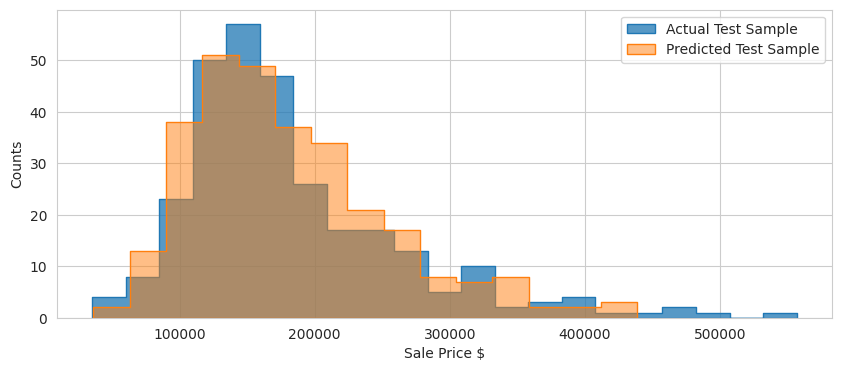

In [50]:
fig = plt.figure(figsize=(10,4))
ax= fig.subplots()

sns.histplot(y_test, ax=ax, label='Actual Test Sample', element='step')
sns.histplot(emodel_test_pred, ax=ax, label='Predicted Test Sample',alpha=0.5, element='step')
plt.ylabel('Counts')
plt.xlabel('Sale Price $')
plt.grid(True)
plt.legend()

The predicted distribution closely matches the true distribution - Model has captured the overall trend and spread of the data well.

The predicted distribution also quite well match the actual distribution shape

### Draw the scatter plot between the true and predicted target

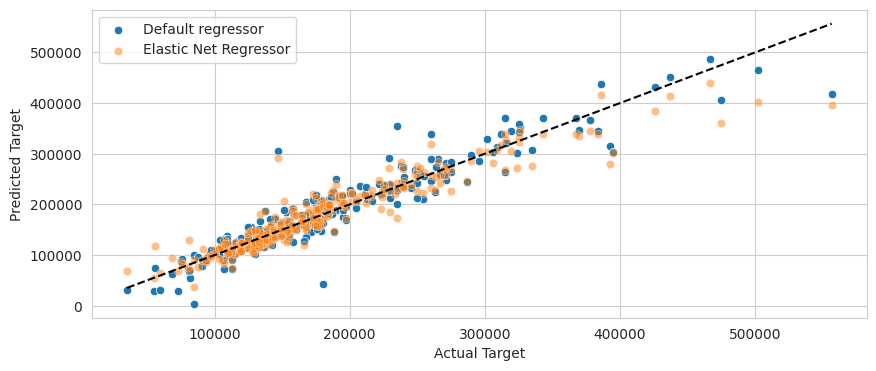

In [51]:
fig = plt.figure(figsize=(10,4))
ax= fig.subplots()

sns.scatterplot(x=y_test, y=defpred_test, ax=ax, label='Default regressor')
sns.scatterplot(x=y_test, y=emodel_test_pred, ax=ax, label='Elastic Net Regressor', alpha=0.5)
plt.ylabel('Predicted Target')
plt.xlabel('Actual Target')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--') # diagonal
plt.grid(True)
plt.legend()

Both default and Elastic Net regressions points close to the diagonal line and points cluster tightly along the diagonal, the model is performing well.= *accurate predictions*

ElasticNet points (orange) are closer to the diagonal than Linear Regression points (blue), so *-* **ElasticNetCV** performs better (lower error).

###  Model Coefficients

For ElasticNet, we can inspect the coef_ attribute to see which features have non-zero coefficients. This provides insights into which features the linear model deemed most important and in what direction (positive or negative impact).
This is valuable for explaining the model's decisions

We will rank the coefficients by size and put them in a bar plot.

In [52]:
feature_names = X_train.columns.tolist()
model_coef = pd.DataFrame(emodel.coef_, index=feature_names, columns=['coefficients']).sort_values(by='coefficients', ascending=True)

model_coef

coefficients
Neighborhood_Edwards -10397.116332
BsmtExposure_No       -7736.396463
LandContour_Bnk       -6812.419832
RoofMatl_ClyTile      -6481.267287
HoiseAge              -6031.321560
...                            ...
KitchenQual_Ex        11087.890881
Neighborhood_NridgHt  11302.507499
Neighborhood_NoRidge  12576.325929
BsmtQual_Ex           12722.137432
OverallQual_GrLiv     25079.339574

[260 rows x 1 columns]

<Axes: >

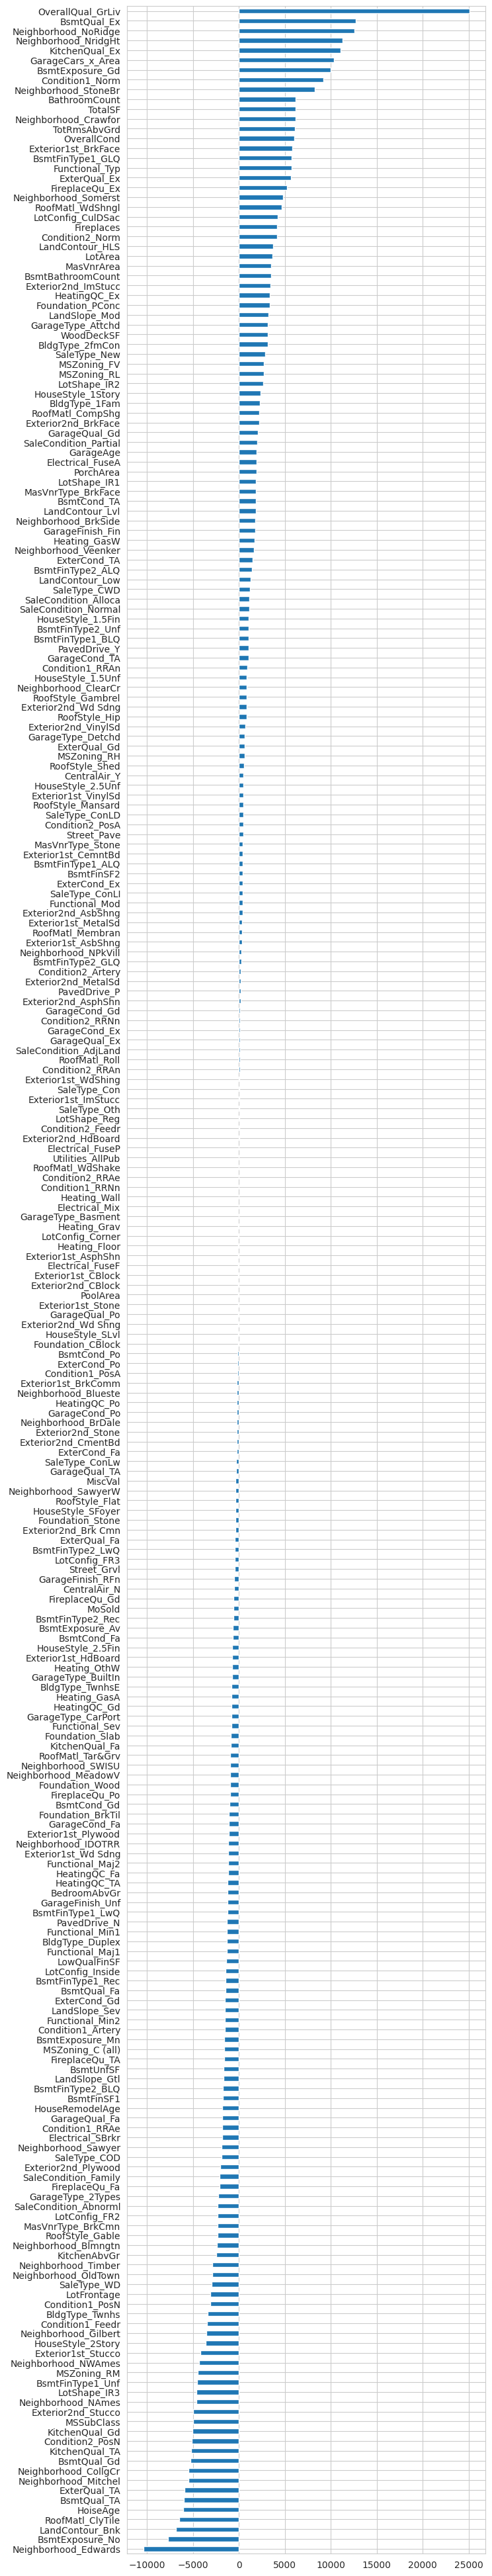

In [53]:
fig = plt.figure(figsize=(7,50))
ax = fig.subplots()

model_coef['coefficients'].plot.barh(ax=ax)

We can conclude that our feature engineering features have really a good positive impact on house price, especially **OverallQual_GrLiv** - which is deemed as *the most important feature* to predict the sale price

### Model Evaluation Summary: ElasticNetCV

 **Audience & Relevance**

This model is designed to predict house sale prices, providing valuable insights for real estate professionals, data product teams, or pricing platforms. Predictive accuracy here can directly impact business decisions like mortgage evaluations or property investment.

**Performance Metrics**

| Metric       | Linear Regression | ElasticNetCV |
| ------------ | ----------------- | ------------ |
| MAE (Train)  | 12,395            | 15,499       |
| MAE (Test)   | 17,263            | 16,734       |
| RMSE (Train) | 19,768            | 28,398       |
| RMSE (Test)  | 26,946            | 26,418       |

While ElasticNetCV had higher training error than Linear Regression (due to regularization), it achieved better generalization on the test set (lower test  errors).

This shows that ElasticNetCV is more robust to overfitting and can be a safer choice for unseen data.

**Top impactful features**

*OverallQual, BsmtQual_Ex, Neighborhood_NoRidge, Neighborhood_NridgHt,  GarageCars_x_Area and KitchenQual_Ex*

*Strengths
Regularized: Handles noisy or correlated features effectively.

Feature interpretability: Useful for understanding which variables drive prices.

Stable generalization: Performs consistently across different datasets.

# Decision Tree Regression

Decision Tree Regression is a machine learning algorithm used to predict continuous numerical values by constructing a tree-like model that recursively partitions the data. It works by splitting the data based on the values of input features, creating a hierarchy of decisions that lead to predicted values at the leaf nodes.

Simply it creates different subsets of data

In [54]:
from sklearn.tree import DecisionTreeRegressor

In [55]:
reg = DecisionTreeRegressor(random_state=77)
reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=77)

In [56]:
reg_train_pred = reg.predict(X_train)
reg_test_pred = reg.predict(X_test)

*Evaluate*

In [57]:
print("Train data")
print(evaluate_metrics(y_train, reg_train_pred))

print("Test data")
print(evaluate_metrics(y_test, reg_test_pred))

Train data
{'MAE': 0.0, 'MSE': 0.0, 'RMSE': np.float64(0.0)}
Test data
{'MAE': 26260.83219178082, 'MSE': 1450010454.791096, 'RMSE': np.float64(38079.002807204604)}


***Test sample***

A perfect score on training data means the model memorized it — this is classic **overfitting**.

***Test sample***
Test performance is much worse, confirming the **overfitting.**

It predicts well on training but struggles to generalize.

In [58]:
reg.score(X_train, y_train)

1.0

In [59]:
reg.score(X_test, y_test)

0.7734158135841069

We got 100% score on **training data.**

On **test data** we got 77.3% score because we did not provide any tuning parameters while intializing the tree as a result of which algorithm split the training data till the leaf node. Due to which depth of tree increased and our model did the overfitting.

That's why we are getting high score on our training data and less score on test data.

So to solve this problem we would use hyper parameter tuning.

We can use GridSearch or RandomizedSearch for hyper parameters tuning.

Now we can also visualize the prediction of our model. For higher resolution we will create x_grid. Which plot the line smooth.

Let's select the most important feature from our data : **OverallQual_GrLiv**

In [60]:
import numpy as np

feature = 'OverallQual_GrLiv'

# Train a simple decision tree on just one feature
reg_feature = DecisionTreeRegressor(random_state=77)
reg_feature = reg_feature.fit(X_train[[feature]], y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


[]

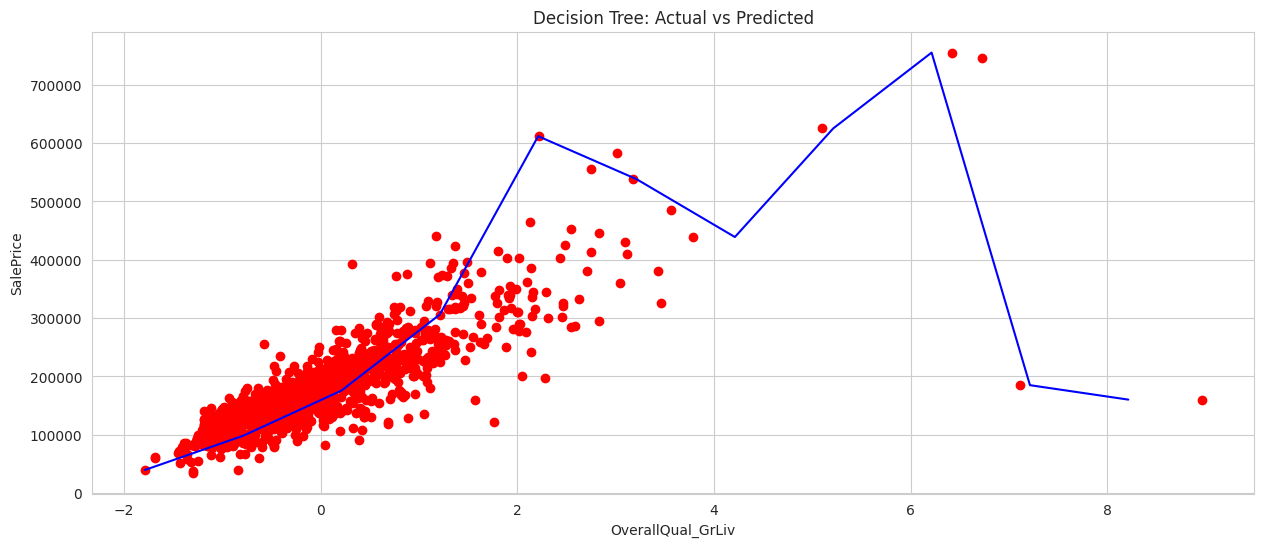

In [61]:
## For smooth line
X_grid = np.arange(min(X_train[feature]), max(X_train[feature]), 1)
X_grid = X_grid.reshape(len(X_grid),1)

plt.figure(figsize=(15,6))

## this will plot points on chart
plt.scatter(X_train[feature], y_train,color='red')

## this will plot the line connecting to points
plt.plot(X_grid, reg_feature.predict(X_grid), color='blue')

## This will give title to our plot
plt.title('Decision Tree: Actual vs Predicted')
plt.xlabel(feature)
plt.ylabel('SalePrice')

plt.plot()

 *What the Plot Shows?*

**Red Dots** = Actual house prices (SalePrice) from your training data.

**Blue Line** = Predicted prices by the Decision Tree model using only the feature OverallQual_GrLiv.

1. Step-like Blue Line

The blue line is not smooth—it jumps in flat steps

2. Follows the Trend at First

For the lower to middle range of OverallQual_GrLiv, the model captures the increasing trend of house price fairly well.

3. Overfitting at the Ends

In higher values (e.g., >6), the blue line jumps sharply and then drops dramatically.


***The Decision Tree model captures general patterns well but tends to overfit***

To dal with overfitting we need to use *Hyperparameter Tuning*

**Hyperparamter Tuning** means we have to select the best values for parameters of algorithm in machine learning. It includes searching and evaluating different combinations of parameters to maximize the performance of model.

To enhance the performance of decision tree regression we can tune its parameters using methods in library like $GridSearchCV$ and $RandomizedSearchCV$.

In [62]:
X_train.shape

(1168, 260)

In [63]:
X_test.shape

(292, 260)

We should primarily use $RandomizedSearchCV$ for hyperparameter tuning for |our Decision Tree Regressor, because:

$GridSearchCV$ will be extremely slow, potentially unfeasible

$RandomizedSearchCV$ will allow you to explore the large feature space more efficiently. The max_features hyperparameter is particularly important for tree-based models when you have many features. RandomizedSearchCV's ability to randomly sample combinations means it can explore different subsets of features at each split, which is beneficial.

In [64]:
from sklearn.model_selection import RandomizedSearchCV

dtr = DecisionTreeRegressor(random_state=77)

In [65]:
# option A
param_grids = {
    'criterion': ['squared_error', 'absolute_error'],
    'splitter': ['best', 'random'],
    'max_depth' : [3, 5, 7, 10],
    'min_samples_split' : [2,5,10,20],
    'min_samples_leaf' : [None,1,2,5,10],
    'max_features' : [None, 'sqrt', 'log2', 0.5, 0.7]
}

In [66]:
# Option B
param_grids = {
    'criterion': ['squared_error', 'absolute_error'],
    'splitter': ['best', 'random'],
    'max_depth' : [10, 15, 20, 25, 30, None], # Adjusted: allow deeper trees
    'min_samples_split' : [2, 5, 10, 20],
    'min_samples_leaf' : [1, 2, 5, 10],      # Corrected: removed 'None'
    'max_features' : [None, 'sqrt', 'log2', 0.5, 0.7] # Assuming 0,7 was fixed to 0.7
}

In [67]:
random_search = RandomizedSearchCV(
    estimator=dtr,                       # Parameter 1
    param_distributions=param_grids,     # Parameter 2
    n_iter=50,                          # Parameter 3
    cv=5,                               # Parameter 4
    scoring='neg_mean_squared_error',   # Parameter 5
    random_state=77,                    # Parameter 6
    n_jobs=-1,                          # Parameter 7
    verbose=1                           # Parameter 8
)

In [68]:
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=77),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error'],
                                        'max_depth': [10, 15, 20, 25, 30, None],
                                        'max_features': [None, 'sqrt', 'log2',
                                                         0.5, 0.7],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 20],
                                        'splitter': ['best', 'random']},
                   random_state=77, scoring='neg_mean_squared_error',
                   verbose=1)

In [69]:
best_params = random_search.best_params_
print("Best params:")
best_params

Best params:


{'splitter': 'best',
 'min_samples_split': 5,
 'min_samples_leaf': 5,
 'max_features': None,
 'max_depth': 30,
 'criterion': 'absolute_error'}

Now we can Refit the model with the best parameters

In [70]:
best_dtr = DecisionTreeRegressor(**best_params, random_state=77)
best_dtr.fit(X_train, y_train)

DecisionTreeRegressor(criterion='absolute_error', max_depth=30,
                      min_samples_leaf=5, min_samples_split=5, random_state=77)

Make Predictions

In [71]:
dtr_train_pred = best_dtr.predict(X_train)
dtr_test_pred = best_dtr.predict(X_test)

Evaluate the model

In [72]:
print("Train data")
print(evaluate_metrics(y_train, dtr_train_pred))

print("Test data")
print(evaluate_metrics(y_test, dtr_test_pred))

Train data
{'MAE': 11464.669520547945, 'MSE': 594990624.1746576, 'RMSE': np.float64(24392.4296488615)}
Test data
{'MAE': 23216.989726027397, 'MSE': 1107006737.0993152, 'RMSE': np.float64(33271.71076303885)}


Our Decision Tree Regressor is pron to severe overfitting even we tuning hyperparameters.

To make our model significanlty better and reduce overfitting we need to use $Random Forest Regressor$ and $ XGBoost Regressor$

**Why Implement Random Forest and XGBoost?**

You already saw that:

🔴 Linear models (like ElasticNet) perform decently but underfit complex relationships.

🔴 Decision Trees tend to overfit.

*Advantages of Random Forest Regression*

1. Works Well with Large Datasets:
2. Reduces Overfitting
3. Handles Non-Linearity

**Advantages of XGBoost Regressor**
1. Boosting technique — builds trees sequentially to correct previous errors.
2. More accurate than Random Forest in many real-world tasks.

### RandomForestRegressor

In [73]:
from sklearn.ensemble import RandomForestRegressor

In [74]:
rfr = RandomForestRegressor(random_state=77)

rfr_params = {
    "n_estimators": [100,300,500,700],
    'max_depth': [10,15,25,35,None],
    'min_samples_leaf': [1,2,4,8,16],
    'min_samples_split': [1,4,10,20,25],
    'max_features': [None, 'log2', 'sqrt', 0.5, 0.7]
}

In [75]:
random_rfr = RandomizedSearchCV(
    estimator=rfr,
    param_distributions=rfr_params,
    cv=5,
    scoring='neg_mean_squared_error',
    random_state=77,
    n_jobs=-1,
    verbose=1
)

In [76]:
random_rfr.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=77),
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 15, 25, 35, None],
                                        'max_features': [None, 'log2', 'sqrt',
                                                         0.5, 0.7],
                                        'min_samples_leaf': [1, 2, 4, 8, 16],
                                        'min_samples_split': [1, 4, 10, 20, 25],
                                        'n_estimators': [100, 300, 500, 700]},
                   random_state=77, scoring='neg_mean_squared_error',
                   verbose=1)

In [77]:
best_rfr_pars = random_rfr.best_params_
print("Best params:")
best_rfr_pars

Best params:


{'n_estimators': 700,
 'min_samples_split': 4,
 'min_samples_leaf': 2,
 'max_features': 0.7,
 'max_depth': 15}

Now we can create a updated Random Forest Regressor with the best params we've got by using RandomSearchCV

In [78]:
best_rfr = RandomForestRegressor(**best_rfr_pars, random_state=77)
best_rfr.fit(X_train, y_train)

RandomForestRegressor(max_depth=15, max_features=0.7, min_samples_leaf=2,
                      min_samples_split=4, n_estimators=700, random_state=77)

In [79]:
pred_train_rfr = best_rfr.predict(X_train)
pred_test_rfr = best_rfr.predict(X_test)

In [80]:
print("Train data")
print(evaluate_metrics(y_train, pred_train_rfr))

print("Test data")
print(evaluate_metrics(y_test, pred_test_rfr))

Train data
{'MAE': 7078.799180134685, 'MSE': 186025128.38231215, 'RMSE': np.float64(13639.102917065775)}
Test data
{'MAE': 17023.77640090791, 'MSE': 700420034.9798503, 'RMSE': np.float64(26465.44983520685)}


Very great result compare to single Decision tree Regressor, which errors have been

Train data
{'MAE': 11464.669520547945, 'MSE': 594990624.1746576, 'RMSE': np.float64(24392.4296488615)}

Test data
{'MAE': 23216.989726027397, 'MSE': 1107006737.0993152, 'RMSE': np.float64(33271.71076303885)}

$Random Forest Regressor$ reduced **overfitting** that you saw with Decision Tree.

Now we can proceed with implementing and tuning $XGBoost Regressor$.

For tabular data like house prices, XGBoost has a very high probability of achieving even lower test RMSE and better generalization.



In [81]:
from xgboost import XGBRegressor,callback

In [82]:
xgb = XGBRegressor(random_state=77)

xgb_params = {
    'n_estimators':  [100,300,500,700],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'max_depth':  [3,7,10,13],
    'subsample': [0.6, 0.7, 0.8,0.9,1],
    'colsample_bytree': [0.6, 0.7, 0.8,0.9,1],
    'gamma': [0, 0.1,0.2,0.3],
    'reg_alpha': [0, 0.001,0.01,0.1],
    'reg_lambda': [0, 0.001,0.01,0.1,1]
}

In [83]:
# Narrow search for fine-tuning
xgb_params_tuned = {
    'n_estimators': [100, 200, 300,500,1000],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0, 0.01, 0.1],
    'reg_lambda': [0.1, 1]
}


In [84]:
random_xgb = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=xgb_params_tuned,
    cv=5,
    scoring='neg_mean_squared_error',
    random_state=77,
    n_jobs=-1,
    verbose=1
)

In [85]:
random_xgb.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          feature_weights=None, gamma=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraint...
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.7, 0.8, 0.9],
                                        'gamma': [0, 0.1, 0.2],
                                        'learning_rate': [0.01, 0.05, 0.1],
                                        'max_depth': [3, 5, 7],
                                        'n_estimators': [100, 200, 300, 500,
                                                         1000],
                                        'reg_alpha': [0, 0.01, 0.1],
                                        'reg_lambda': [0.1, 1],
                                        'subsample': [0.7, 0.8, 0.9]},
                   random_state=77, scoring='neg_mean_squared_error',
                   verbose=1)

In [86]:
best_xgb_pars = random_xgb.best_params_
print("Best params:")
best_xgb_pars

Best params:


{'subsample': 0.7,
 'reg_lambda': 0.1,
 'reg_alpha': 0.01,
 'n_estimators': 200,
 'max_depth': 5,
 'learning_rate': 0.05,
 'gamma': 0.2,
 'colsample_bytree': 0.7}

In [87]:
best_xgb = XGBRegressor(**best_xgb_pars, random_state=77)
best_xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=0.2, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=None, num_parallel_tree=None, ...)

In [88]:
pred_test_xgb = best_xgb.predict(X_test)
pred_train_xgb = best_xgb.predict(X_train)

In [89]:
print("Train data")
print(evaluate_metrics(y_train, pred_train_xgb))

print("Test data")
print(evaluate_metrics(y_test, pred_test_xgb))

Train data
{'MAE': 5475.958663313356, 'MSE': 48874024.48312806, 'RMSE': np.float64(6990.995957882401)}
Test data
{'MAE': 15196.286172945205, 'MSE': 599107341.1719867, 'RMSE': np.float64(24476.669323500424)}


### Cross-Validation

Cross-validation helps assess how well your XGBoost model generalizes to unseen data.

In [90]:
from sklearn.model_selection  import cross_val_score

In [91]:
cv_scores = cross_val_score(best_xgb, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
# Convert scores to positive values
cv_scores = -cv_scores

print("Cross-validation scores:", cv_scores)
print("Mean CV score:", cv_scores.mean())
print("Standard deviation of CV scores:", cv_scores.std())

Cross-validation scores: [1.15481328e+09 1.21415957e+09 7.86970966e+08 5.94040319e+08
 4.39560904e+08]
Mean CV score: 837909008.2336004
Standard deviation of CV scores: 304217237.68764997


Our average error - **Mean CV score** is *~837* million, which is decent compared to test errors you've seen.

But the spread is quite large - **Standard deviation** *~304* million, meaning our model's performance isn't very consistent across folds.

This could be improved by - $Early stopping$ -  a technique used to halt the training process if the model's performance on a validation set does not improve after a specified number of consecutive iterations, thereby preventing overfitting.

To apply early stopping in models like XGBoost, you need to split your X_train into two parts:

1. A training subset – for fitting the model.
2. A validation subset – to monitor performance and stop training early if performance stops improving.



In [92]:
import xgboost as xgb

In [93]:
X_train_sub, X_val, y_train_sub, y_val = train_test_split(X_train,y_train, test_size=0.2, random_state=77)

In [94]:
best_xgb_pars

{'subsample': 0.7,
 'reg_lambda': 0.1,
 'reg_alpha': 0.01,
 'n_estimators': 200,
 'max_depth': 5,
 'learning_rate': 0.05,
 'gamma': 0.2,
 'colsample_bytree': 0.7}

In [95]:
xgb_early = XGBRegressor(
    **best_xgb_pars,
    random_state=77,
    verbosity=1,
    eval_metric='rmse',
    early_stopping_rounds=50,
    verbose=True
)

In [96]:
xgb_early.fit(X_train_sub, y_train_sub,
              eval_set=[(X_val, y_val)])

[0]	validation_0-rmse:78499.09054
[1]	validation_0-rmse:75881.53785
[2]	validation_0-rmse:73103.69447
[3]	validation_0-rmse:70955.79912
[4]	validation_0-rmse:68546.60899
[5]	validation_0-rmse:66187.40463
[6]	validation_0-rmse:64165.73661
[7]	validation_0-rmse:61833.13197
[8]	validation_0-rmse:59824.85755
[9]	validation_0-rmse:58039.31561
[10]	validation_0-rmse:55977.48184
[11]	validation_0-rmse:54622.04779
[12]	validation_0-rmse:53010.01384
[13]	validation_0-rmse:51557.96373
[14]	validation_0-rmse:50090.04959
[15]	validation_0-rmse:48821.49691
[16]	validation_0-rmse:47484.09602
[17]	validation_0-rmse:46234.89204
[18]	validation_0-rmse:45322.91305
[19]	validation_0-rmse:44197.53033
[20]	validation_0-rmse:43225.47038
[21]	validation_0-rmse:42411.01189
[22]	validation_0-rmse:41539.19812
[23]	validation_0-rmse:40740.81764
[24]	validation_0-rmse:39966.26747
[25]	validation_0-rmse:39190.24757
[26]	validation_0-rmse:38695.32423
[27]	validation_0-rmse:37887.72310
[28]	validation_0-rmse:37364.4

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [08:34:54] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  self.starting_round = model.num_boosted_rounds()


[33]	validation_0-rmse:34352.41194
[34]	validation_0-rmse:33964.10370
[35]	validation_0-rmse:33507.97134
[36]	validation_0-rmse:33132.76219
[37]	validation_0-rmse:32414.57872
[38]	validation_0-rmse:32131.33886
[39]	validation_0-rmse:31803.53313
[40]	validation_0-rmse:31484.75424
[41]	validation_0-rmse:31332.65531
[42]	validation_0-rmse:30972.68775
[43]	validation_0-rmse:30669.42356
[44]	validation_0-rmse:30247.44890
[45]	validation_0-rmse:30045.83269
[46]	validation_0-rmse:29784.74326
[47]	validation_0-rmse:29569.83695
[48]	validation_0-rmse:29485.46972
[49]	validation_0-rmse:29228.53433
[50]	validation_0-rmse:28995.38337
[51]	validation_0-rmse:28822.49955
[52]	validation_0-rmse:28732.43180
[53]	validation_0-rmse:28586.34019
[54]	validation_0-rmse:28582.08975
[55]	validation_0-rmse:28481.41035
[56]	validation_0-rmse:28309.87614
[57]	validation_0-rmse:28240.07020
[58]	validation_0-rmse:28168.51859
[59]	validation_0-rmse:28045.40816
[60]	validation_0-rmse:27965.40595
[61]	validation_0-rm

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             feature_weights=None, gamma=0.2, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=None, num_parallel_tree=None, ...)

Check the Best Iteration Used

In [97]:
print('Best iteration:', xgb_early.best_iteration)

Best iteration: 171


The best iteration was likely 171, and after that, validation RMSE plateaus or even slightly worsens.

Early stopping helped prevent overfitting by halting further boosting once no gain was found.




In [98]:
pred_test_xgb_early = xgb_early.predict(X_test)
pred_train_xgb_early = xgb_early.predict(X_train)

In [99]:
print("Train data")
print(evaluate_metrics(y_train, pred_train_xgb_early))

print("Test data")
print(evaluate_metrics(y_test, pred_test_xgb_early))

Train data
{'MAE': 7362.98302052119, 'MSE': 163442311.10191628, 'RMSE': np.float64(12784.455839100712)}
Test data
{'MAE': 14266.782721532534, 'MSE': 545436950.2193295, 'RMSE': np.float64(23354.591630326777)}


1. Early stopping helped reduce overfitting compared to your earlier XGBoost run
2. Your test RMSE and MAE are significantly lower than in Decision Tree and Random Forest models — this suggests:

The XGBoost model generalizes better.


3. The train/test gap (around ~7k MAE difference) is expected and reasonable — it means your model is not memorizing training data.



Understanding why our model makes a prediction is just as important as knowing what it predicts. While traditional metrics like RMSE tell you how accurate our model is, they don't reveal which factors are driving the predictions or how those factors influence the outcome. This is where SHAP (SHapley Additive exPlanations) comes in.

***SHAP*** *(SHapley Additive exPlanations)* is a framework for model interpretability that calculates the impact of each feature on a prediction using Shapley values from cooperative game theory. It provides consistent and accurate explanations for individual predictions, allowing users to understand the importance of different features and detect potential biases in their machine learning models

In [100]:
!pip install shap
import shap

### Global Importance

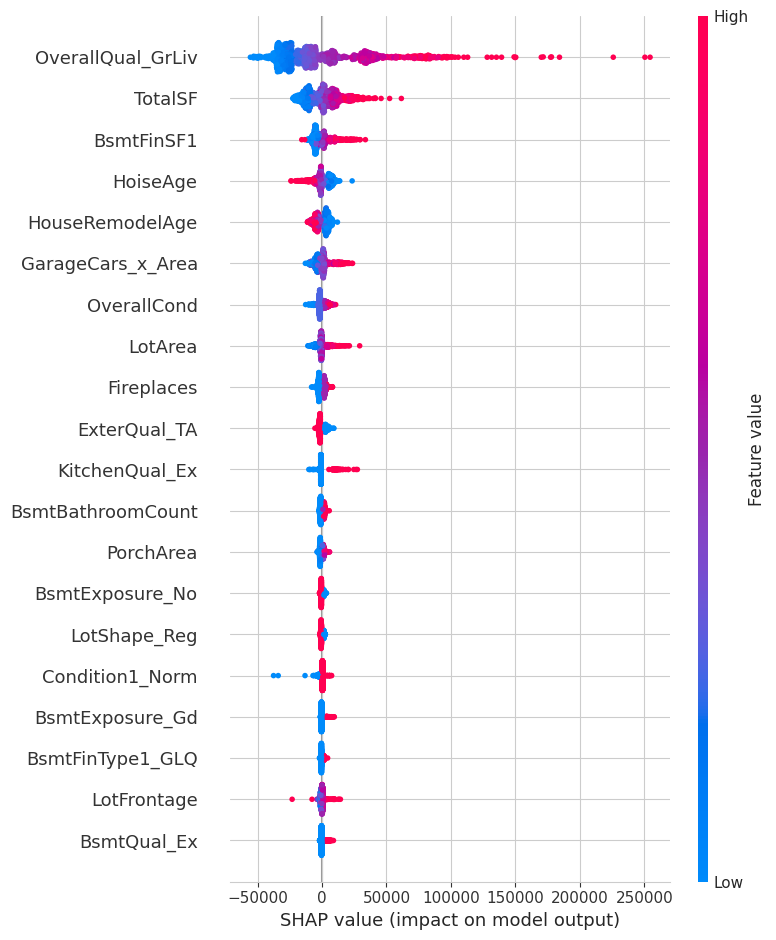

In [101]:
# Initialize the SHAP explainer
explainer = shap.TreeExplainer(xgb_early)

# Calculate SHAP values for all instances
shap_values = explainer.shap_values(X_train)

# Visualize global feature importance using summary plot
shap.summary_plot(shap_values, X_train)

**Global Importance** refers to understanding the overall impact and importance of features in the model across the entire dataset. It helps to identify the features that have the most significant influence on predictions in a general sense.


The Global Importance of SHAP enable us to identify the most influential features in your model, understand their effects on predictions, and assess their relative importance in a global context.

Let's use the above results, and the following findings can be derived.


1. ***Feature Importance***: Among the features analyzed, $OverallQual GrLiv$ emerges as the most important feature, indicating that it has the most significant impact on predictions. $TotalSF$ follows as the second most important feature, while $BsmtQualEx$ appears to have the least influence on predictions.```
2. ***Feature Effects***: Features such as *OverallQual GrLiv, TotalSF, Ejection_fraction, BsmtFinSF* exhibit a long tail to the right in the summary plot. This indicates that higher feature values for these variables have a greater impact on prediction. On the other hand, *OverallQual GrLiv* showS a tail to the left, suggesting that higher values of these features negatively impact the predictions. It is noted that *OverallQual GrLiv* has both postive and negative impact on prediction.



### Local Importance

***Local Importance*** focuses on understanding the impact and contribution of features for individual predictions. It helps to explain why a specific prediction was made by highlighting the importance of different features for that particular instance.

The Local Importance of SHAP exhibits what features are crucial factors in prediction.

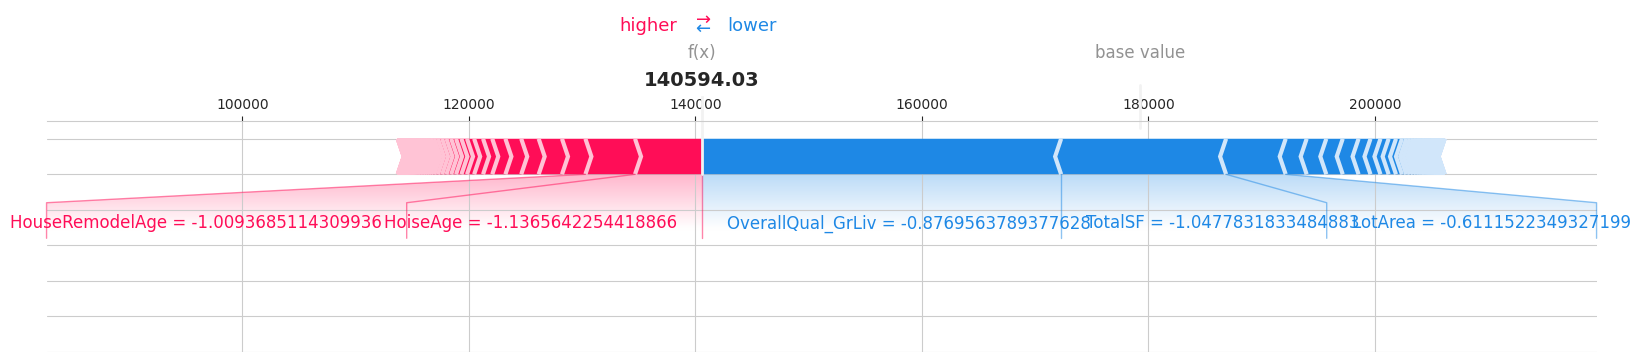

In [104]:
import shap

# Initialize the JS visualization for Jupyter/Colab
shap.initjs()

# Create the TreeExplainer for your trained model
explainer = shap.TreeExplainer(xgb_early)

# Choose one sample from your test set — for example, the 10th house
sample_index=10
X_sample = X_test.iloc[[sample_index]]

# Get SHAP values for that one prediction
shap_values_single_pred = explainer.shap_values(X_sample)

# Use force plot to explain the prediction
shap.force_plot(
    explainer.expected_value,   # base value (average prediction)
    shap_values_single_pred,    # feature impacts for this house
    X_sample,                   # actual feature values
    matplotlib=True
)

- *Red* arrows → features increased the price prediction.

- *Blue* arrows → features decreased the price prediction.

### Summary of our Force Plot:
*Final predicted price: 140,594.03*

*Base value* (average price across training data): Somewhere around *180,000 *(estimated from the plot center).

So, the model lowered the price by *~40,000* for this particular house.

**What pushed the price ↓ down** (blue arrows)?

These features contributed negatively ( reduced the predicted price):

| Feature             | Impact   | Meaning                                                        |
| ------------------- | ------------------ | -------------------------------------------------------------- |
| `OverallQual_GrLiv` | −0.877 | A lower combination of overall quality and living area ↓ price |
| `TotalSF`           | −1.047             | Smaller total square footage ↓ price                           |
| `LotArea`           | −0.611              | Smaller lot area (land size) ↓ price                           |


**What pushed the price ↑ up** (red arrows)?

These features contributed positively (increased the predicted price):

| Feature           | Impact (approx) | Meaning                                                               |
| ----------------- | --------------- | --------------------------------------------------------------------- |
| `HouseRemodelAge` | +1.01           | The house was remodeled relatively recently → **added value**         |
| `HouseAge`        | +1.136          | Quite fresh house → **added value** |


The model predicted this houses price as $$140,594,$ which is $~$40K$ lower than the average training price.

The main factors reducing its value were:

1. A relatively small total living space and lot area

2. And possibly a lower overall quality rating.

However, the house’s younger age and recent remodeling helped partially counterbalance this.”

In [113]:
sample_index = 10
X_sample = X_test.iloc[[sample_index]]
y_true = y_test.iloc[sample_index]

pred_defmodel = defmodel.predict(X_sample)[0]
pred_emodel = emodel.predict(X_sample)[0]
pred_best_dtr = best_dtr.predict(X_sample)[0]
pred_best_rfr = best_rfr.predict(X_sample)[0]
pred_xgb_early = xgb_early.predict(X_sample)[0]

# Print the predictions
print(f"True Price:              {y_true:.2f}")
print(f"Default Model:           {pred_defmodel:.2f}")
print(f"Tuned Model (emodel):    {pred_emodel:.2f}")
print(f"Decision Tree (best_dtr):{pred_best_dtr:.2f}")
print(f"Random Forest (best_rfr):{pred_best_rfr:.2f}")
print(f"XGBoost (xgb_early):     {pred_xgb_early:.2f}")

True Price:              155900.00
Default Model:           129774.62
Tuned Model (emodel):    146037.10
Decision Tree (best_dtr):141250.00
Random Forest (best_rfr):142804.07
XGBoost (xgb_early):     140594.14


# ✅ Conclusion
In this project, we developed a robust machine learning pipeline to predict house prices using the Ames Housing dataset. Multiple regression models were trained, tuned, and evaluated, including:

**A default baseline model**

**A ElasticNet CV model**

**A manually tuned Decision Tree**

**A Random Forest with optimized hyperparameters** (using RandomSearchCV)

**A finely-tuned XGBoost model with early stopping**

🔍 *Model Performance Highlights:*

- 🏆 Best Model: XGBoost (with early stopping)

- 📉 Test RMSE: ~23,354

- 📉 Test MAE: ~14,266

🧠 *Interpretability with SHAP:*

To go beyond accuracy and build trust in the model, we applied ***SHAP*** (SHapley Additive exPlanations) to:

1. Identify globally important features (e.g. living area, quality scores)

2. Explain individual predictions, showing how features push predictions up/down

📌 Key Takeaways:

- Feature engineering and preprocessing significantly improved performance

- Hyperparameter tuning + early stopping prevented overfitting

- Model interpretability via SHAP makes the model more actionable and explainable for stakeholders










